In [11]:
import sys
sys.path.append("..\\")
sys.path
import pandas as pd
from sklearn import preprocessing
from pathlib import Path
import FLUCCOplus.config as config

p = config.DATA_PROCESSED / Path("peexcel_profile_jan_2022.csv")
df = pd.read_csv(p, encoding="cp850")


In [12]:
df.head()

,Wind 2013,Wind 2015,Wind 2016,"Wind 2030, TU EEG, ""Stromzukunft""",WEB 2015 Umgebung Wien,Hochrechnung Ueberschuss 2050,Wind AT 2017,Wind AT 2018,Wind AT 2019,Wind AT 2020
0,0.853350,0.065328,0.228967,2.016161,0.0,0.0,92.799,914.630,245,1891
1,0.857153,0.069790,0.152220,2.000837,0.0,0.0,86.097,832.387,188,1969
2,0.860945,0.064174,0.109599,1.965811,0.0,0.0,72.062,926.463,139,1985
3,0.888022,0.064889,0.055622,2.646621,0.0,0.0,73.376,691.546,115,1852
4,0.859141,0.063968,0.039038,3.246434,0.0,0.0,68.995,453.314,163,1709


In [13]:
def normalize(dataframe, columns=None):
    """
    :return dataframe (normalized):
    """
    df = dataframe

    if columns is None:
        columns = df.columns

    x = df[columns].values  # returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    ndf = pd.DataFrame(x_scaled, columns=df[columns].columns, index=df.index)
    return ndf

In [14]:
df = normalize(df)

In [15]:
import numpy as np
dates = np.arange("2018-01-01","2019-01-01 00:00", dtype="datetime64[h]")
df.index = dates
df.head()

,Wind 2013,Wind 2015,Wind 2016,"Wind 2030, TU EEG, ""Stromzukunft""",WEB 2015 Umgebung Wien,Hochrechnung Ueberschuss 2050,Wind AT 2017,Wind AT 2018,Wind AT 2019,Wind AT 2020
2018-01-01 00:00:00,0.623076,0.029658,0.089650,0.301967,0.0,0.0,0.034815,0.313971,0.081336,0.636425
2018-01-01 01:00:00,0.625853,0.031710,0.059536,0.299672,0.0,0.0,0.032298,0.285723,0.062099,0.662732
2018-01-01 02:00:00,0.628622,0.029128,0.042812,0.294426,0.0,0.0,0.027026,0.318035,0.045562,0.668128
2018-01-01 03:00:00,0.648394,0.029456,0.021632,0.396393,0.0,0.0,0.027519,0.237349,0.037462,0.623272
2018-01-01 04:00:00,0.627305,0.029033,0.015125,0.486230,0.0,0.0,0.025874,0.155524,0.053662,0.575042


<Axes: >

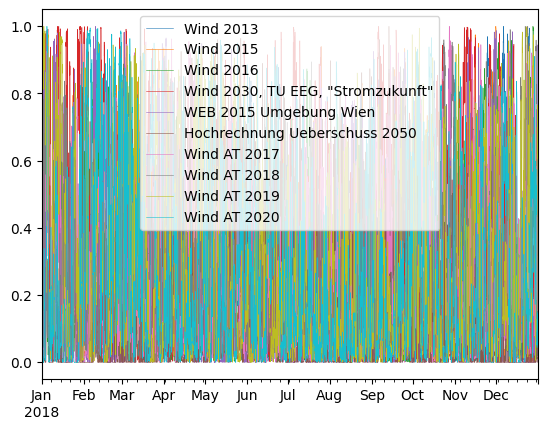

In [16]:
df.plot(linewidth=0.4)

In [17]:
manutz = ["MANutz/Schaltsignal_REF.csv",
"MANutz/Schaltsignal_REG.csv",
"MANutz/Schaltsignal_uba30.csv",
"MANutz/Schaltsignal_uba50.csv",
"MANutz/Schaltsignal_veigl30.csv",
"MANutz/Schaltsignal_veigl50.csv" ]

df_nutz = pd.DataFrame()
for p in manutz:
    p = config.DATA_PROCESSED / Path(p)
    a = pd.read_csv(p).iloc[:,1]
    df_nutz[str(p).split("_")[1][:-4]] = a
df_nutz.index = dates
df_nutz.head()
df_nutz = df_nutz.replace(1,-1)
df_nutz = df_nutz.replace(0,1).replace(-1,0)


In [18]:
p = config.DATA_PROCESSED / Path("DrexelCO2/Signale_CO2mix_SpotMarket.xlsx")
df_drexelco2 = pd.read_excel(p, index_col=(0))
df_drexelco2.index = dates
df_drexelco2

,1.5WP-3K-PV/Battery-CO2,1.3WP-3K-PV/Battery-CO2,1.3WP-3K-keine PV/Battery-CO2/Preis,1.3WP-3K-PV/Battery-CO2/Preis,1.3WP-3K-PV/Battery-Preis
2018-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0
2018-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0
2018-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0
2018-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0
2018-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2018-12-31 19:00:00,0.0,0.0,0.0,0.0,0.0
2018-12-31 20:00:00,0.0,0.0,0.0,0.0,0.0
2018-12-31 21:00:00,0.0,0.0,0.0,0.0,0.0
2018-12-31 22:00:00,0.0,0.0,0.0,0.0,0.0


In [19]:
df=pd.concat([df, df_nutz], axis=1)
df.head()


,Wind 2013,Wind 2015,Wind 2016,"Wind 2030, TU EEG, ""Stromzukunft""",WEB 2015 Umgebung Wien,Hochrechnung Ueberschuss 2050,Wind AT 2017,Wind AT 2018,Wind AT 2019,Wind AT 2020,REF,REG,uba30,uba50,veigl30,veigl50
2018-01-01 00:00:00,0.623076,0.029658,0.089650,0.301967,0.0,0.0,0.034815,0.313971,0.081336,0.636425,1.0,1.0,1.0,1.0,1.0,1.0
2018-01-01 01:00:00,0.625853,0.031710,0.059536,0.299672,0.0,0.0,0.032298,0.285723,0.062099,0.662732,1.0,1.0,1.0,1.0,1.0,1.0
2018-01-01 02:00:00,0.628622,0.029128,0.042812,0.294426,0.0,0.0,0.027026,0.318035,0.045562,0.668128,1.0,1.0,1.0,1.0,1.0,1.0
2018-01-01 03:00:00,0.648394,0.029456,0.021632,0.396393,0.0,0.0,0.027519,0.237349,0.037462,0.623272,1.0,1.0,1.0,1.0,1.0,1.0
2018-01-01 04:00:00,0.627305,0.029033,0.015125,0.486230,0.0,0.0,0.025874,0.155524,0.053662,0.575042,0.0,0.0,0.0,0.0,0.0,1.0


Freigabesignal wenn > x% der Nennleistung

In [20]:
import os
#TODO: into data
if not os.path.exists("..\data\Plots"):
        os.makedirs("..\data\Plots")

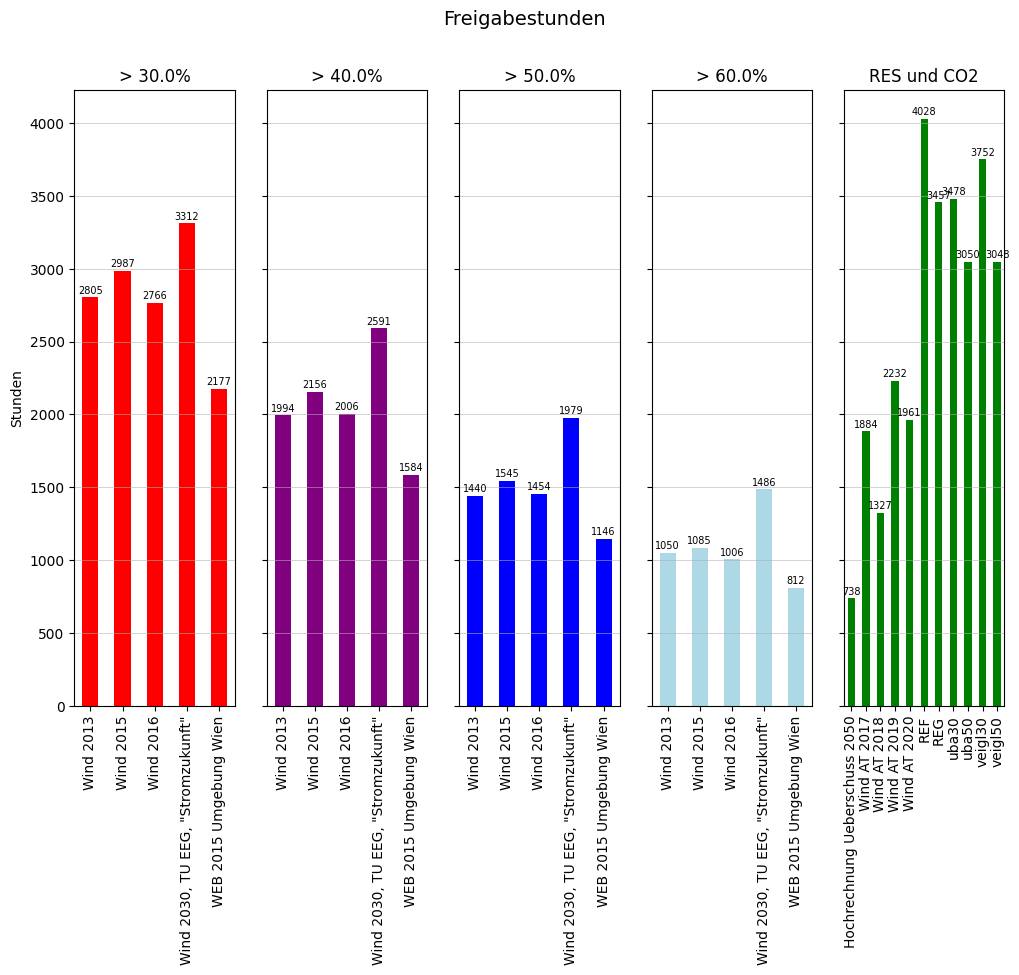

In [21]:
import matplotlib.pyplot as plt

cutoffs = [0.3,0.4,0.5,0.6]
colors=["red","purple","blue", "lightblue"]
anzahl = pd.DataFrame()
c1 = df.columns[:-11]
c2 = df.columns[-11:]
fig, ax = plt.subplots(1, len(cutoffs)+1, sharey=True, figsize=(12,8))
for i, x in enumerate(cutoffs):
    sig = df[c1].where(df>x)
    sig.count().plot(kind="bar", ylabel="Stunden", ax=ax[i], title=f"> {x*100}%", color=colors[i])
    for p in ax[i].patches:
      ax[i].annotate("{:.0f}" .format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=7, color='black', xytext=(0, 5), textcoords='offset points')
    ax[i].grid(axis="y", linewidth=0.4)
sig = df[c2].where(df>0.5)
sig.count().plot(kind="bar", ax=ax[len(cutoffs)], title="RES und CO2", color="green")
for t in ax[4].patches:
    ax[4].annotate("{:.0f}" .format(t.get_height()), (t.get_x() + t.get_width() / 2., t.get_height()), ha='center', va='center', fontsize=7, color='black', xytext=(0, 5), textcoords='offset points')
    ax[4].grid(axis="y", linewidth=0.4)
fig.suptitle('Freigabestunden', fontsize=14)
fig.savefig("../data/Plots/freigabestunden_1.png", dpi=300, bbox_inches="tight")

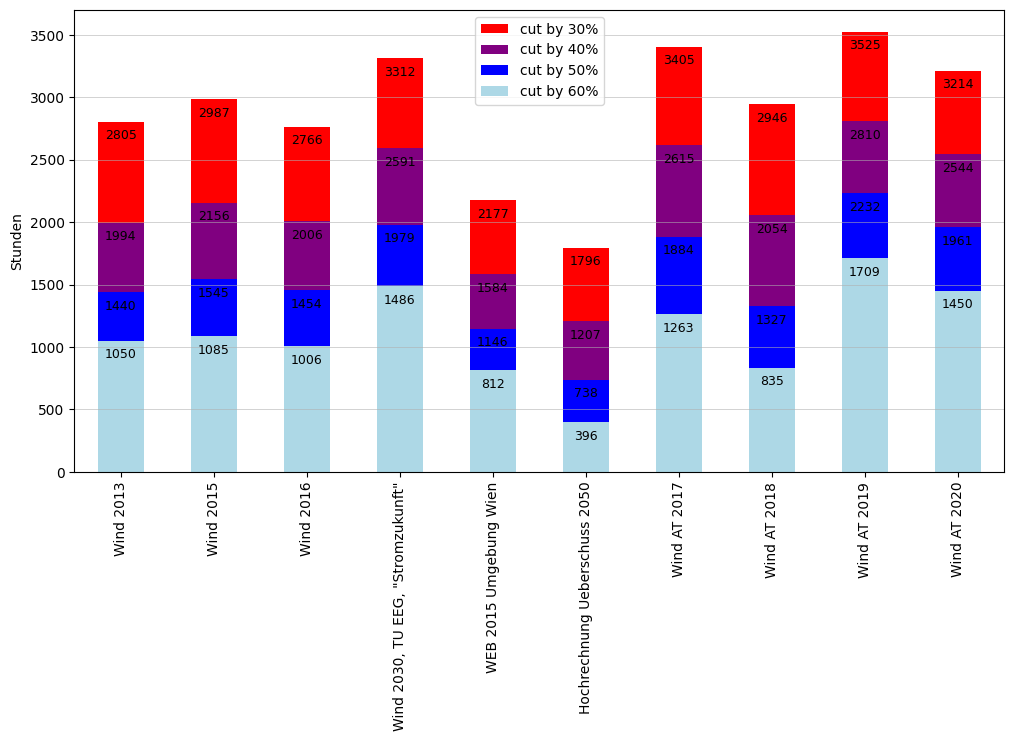

In [22]:

anzahl = pd.DataFrame()
c1 = df.columns[:-6]
fig, ax = plt.subplots(1, figsize=(12,6))
sig30 = df[c1].where(df>0.3)
sig40 = df[c1].where(df>0.4)
sig50 = df[c1].where(df>0.5)
sig60 = df[c1].where(df>0.6)

sig30.count().plot(kind="bar", ax=ax, color="red", ylabel="Stunden", label="cut by 30%")
sig40.count().plot( kind="bar", ax=ax, color="purple", label="cut by 40%")
sig50.count().plot(kind="bar", ax=ax, color="blue", label="cut by 50%")
sig60.count().plot(kind="bar", ax=ax, color="lightblue", label="cut by 60%")
for p in ax.patches:
      ax.annotate("{:.0f}" .format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, -10), textcoords='offset points')
ax.grid(axis="y", linewidth=0.4)
plt.legend()
fig.savefig("../data/Plots/freigabestunden_overlapped.png", dpi=300, bbox_inches="tight")

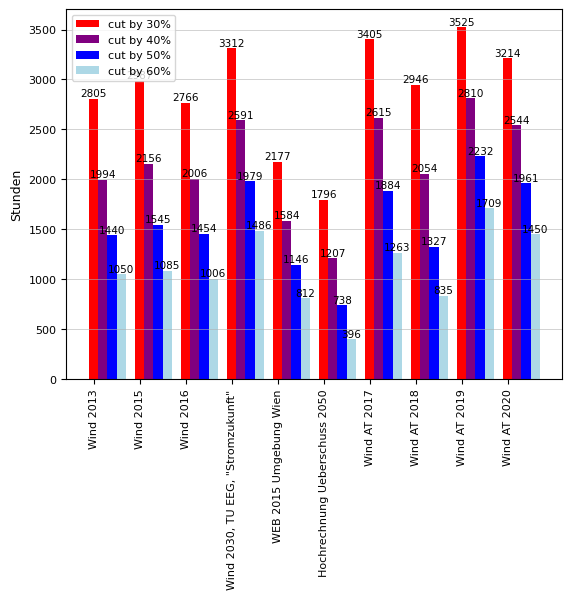

In [23]:
x = np.arange(10)

width = 0.20
text_size = 9
plt.rc('font', size=text_size-1)          # controls default text sizes
plt.rc('axes', titlesize=text_size)     # fontsize of the axes title
plt.rc('axes', labelsize=text_size)
bar1 = plt.bar(x, sig30.count(), width, color="red", label="cut by 30%")
bar2 = plt.bar(x+0.2, sig40.count(), width, color="purple", label="cut by 40%")
bar3 = plt.bar(x+0.4, sig50.count(), width, color="blue", label="cut by 50%")
bar4 = plt.bar(x+0.6, sig60.count(), width, color="lightblue", label="cut by 60%")
for rect in bar1 + bar2 + bar3 + bar4:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.0f}', ha='center', va='bottom', fontsize=7.5, color='black')

plt.grid(axis="y", linewidth=0.4)
plt.xticks(x, sig30.columns)
plt.ylabel('Stunden')
plt.xticks(rotation=90)
plt.legend()
plt.savefig("../data/Plots/freigabestunden_gruppiert.png", dpi=300, bbox_inches="tight")

In [24]:
import seaborn as sns
#anzahl
#sns.relplot(data=anzahl)

In [25]:
df=pd.concat([df, df_drexelco2], axis=1)
df.head()

,Wind 2013,Wind 2015,Wind 2016,"Wind 2030, TU EEG, ""Stromzukunft""",WEB 2015 Umgebung Wien,Hochrechnung Ueberschuss 2050,Wind AT 2017,Wind AT 2018,Wind AT 2019,Wind AT 2020,...,REG,uba30,uba50,veigl30,veigl50,1.5WP-3K-PV/Battery-CO2,1.3WP-3K-PV/Battery-CO2,1.3WP-3K-keine PV/Battery-CO2/Preis,1.3WP-3K-PV/Battery-CO2/Preis,1.3WP-3K-PV/Battery-Preis
2018-01-01 00:00:00,0.623076,0.029658,0.089650,0.301967,0.0,0.0,0.034815,0.313971,0.081336,0.636425,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 01:00:00,0.625853,0.031710,0.059536,0.299672,0.0,0.0,0.032298,0.285723,0.062099,0.662732,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 02:00:00,0.628622,0.029128,0.042812,0.294426,0.0,0.0,0.027026,0.318035,0.045562,0.668128,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 03:00:00,0.648394,0.029456,0.021632,0.396393,0.0,0.0,0.027519,0.237349,0.037462,0.623272,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 04:00:00,0.627305,0.029033,0.015125,0.486230,0.0,0.0,0.025874,0.155524,0.053662,0.575042,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [26]:
df.columns

Index(['Wind 2013', 'Wind 2015', 'Wind 2016',
       'Wind 2030, TU EEG, "Stromzukunft"', 'WEB 2015 Umgebung Wien',
       'Hochrechnung Ueberschuss 2050', 'Wind AT 2017', 'Wind AT 2018',
       'Wind AT 2019', 'Wind AT 2020', 'REF', 'REG', 'uba30', 'uba50',
       'veigl30', 'veigl50', '1.5WP-3K-PV/Battery-CO2',
       '1.3WP-3K-PV/Battery-CO2', '1.3WP-3K-keine PV/Battery-CO2/Preis',
       '1.3WP-3K-PV/Battery-CO2/Preis', '1.3WP-3K-PV/Battery-Preis'],
      dtype='object')

In [27]:
cut = 0.5
df_sign = pd.DataFrame()
for c in df.columns:
    df_sign[c] = df[c].map(lambda x: -1 if x < cut else 1)

In [28]:
df_sign

,Wind 2013,Wind 2015,Wind 2016,"Wind 2030, TU EEG, ""Stromzukunft""",WEB 2015 Umgebung Wien,Hochrechnung Ueberschuss 2050,Wind AT 2017,Wind AT 2018,Wind AT 2019,Wind AT 2020,...,REG,uba30,uba50,veigl30,veigl50,1.5WP-3K-PV/Battery-CO2,1.3WP-3K-PV/Battery-CO2,1.3WP-3K-keine PV/Battery-CO2/Preis,1.3WP-3K-PV/Battery-CO2/Preis,1.3WP-3K-PV/Battery-Preis
2018-01-01 00:00:00,1,-1,-1,-1,-1,-1,-1,-1,-1,1,...,1,1,1,1,1,-1,-1,-1,-1,-1
2018-01-01 01:00:00,1,-1,-1,-1,-1,-1,-1,-1,-1,1,...,1,1,1,1,1,-1,-1,-1,-1,-1
2018-01-01 02:00:00,1,-1,-1,-1,-1,-1,-1,-1,-1,1,...,1,1,1,1,1,-1,-1,-1,-1,-1
2018-01-01 03:00:00,1,-1,-1,-1,-1,-1,-1,-1,-1,1,...,1,1,1,1,1,-1,-1,-1,-1,-1
2018-01-01 04:00:00,1,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,-1,-1,-1,1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,...,1,1,1,1,1,-1,-1,-1,-1,-1
2018-12-31 20:00:00,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,...,1,1,1,1,1,-1,-1,-1,-1,-1
2018-12-31 21:00:00,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,...,1,1,1,1,1,-1,-1,-1,-1,-1
2018-12-31 22:00:00,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,...,1,1,1,1,1,-1,-1,-1,-1,-1


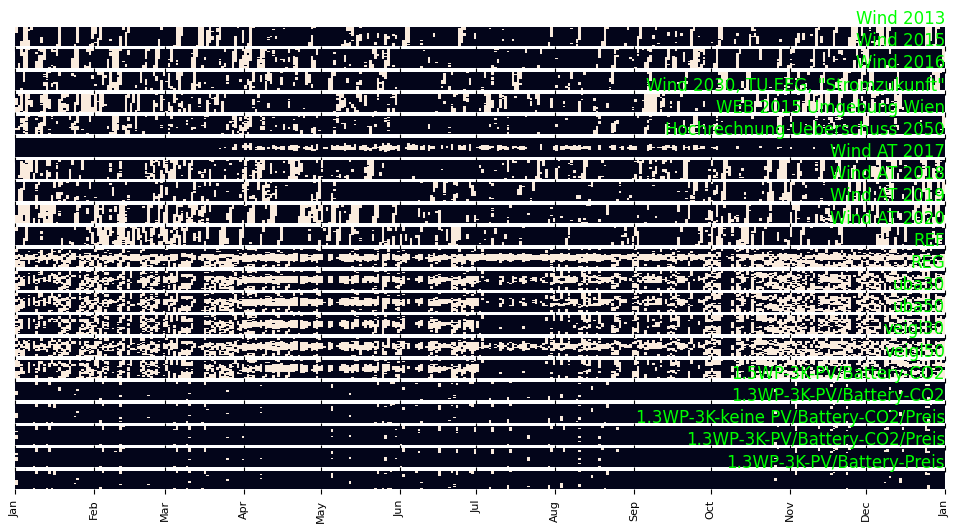

In [29]:
from matplotlib.dates import MonthLocator
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots(len(df_sign.columns), 1, sharex=True, sharey=True, figsize=(12,6))
for i, col in enumerate(df_sign.columns):
    vis = pd.pivot_table(df_sign,
                         index=df_sign.index.date, columns=df_sign.index.hour, values=col)
    sns.heatmap(vis.T,
                cbar=False,
                yticklabels=False,
                ax=ax[i])
    ax[i].set_title(col, loc="right", color="lime", fontsize=12, pad=-11)
    months = MonthLocator()
    monthsFmt = DateFormatter("%b")
    ax[i].xaxis.set_major_locator(months)
    ax[i].xaxis.set_major_formatter(monthsFmt)

In [30]:
fig.savefig(f"../data/Plots/heatmap_{cut}_2019.png", dpi=300)

In [31]:
df_sign

,Wind 2013,Wind 2015,Wind 2016,"Wind 2030, TU EEG, ""Stromzukunft""",WEB 2015 Umgebung Wien,Hochrechnung Ueberschuss 2050,Wind AT 2017,Wind AT 2018,Wind AT 2019,Wind AT 2020,...,REG,uba30,uba50,veigl30,veigl50,1.5WP-3K-PV/Battery-CO2,1.3WP-3K-PV/Battery-CO2,1.3WP-3K-keine PV/Battery-CO2/Preis,1.3WP-3K-PV/Battery-CO2/Preis,1.3WP-3K-PV/Battery-Preis
2018-01-01 00:00:00,1,-1,-1,-1,-1,-1,-1,-1,-1,1,...,1,1,1,1,1,-1,-1,-1,-1,-1
2018-01-01 01:00:00,1,-1,-1,-1,-1,-1,-1,-1,-1,1,...,1,1,1,1,1,-1,-1,-1,-1,-1
2018-01-01 02:00:00,1,-1,-1,-1,-1,-1,-1,-1,-1,1,...,1,1,1,1,1,-1,-1,-1,-1,-1
2018-01-01 03:00:00,1,-1,-1,-1,-1,-1,-1,-1,-1,1,...,1,1,1,1,1,-1,-1,-1,-1,-1
2018-01-01 04:00:00,1,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,-1,-1,-1,1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,...,1,1,1,1,1,-1,-1,-1,-1,-1
2018-12-31 20:00:00,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,...,1,1,1,1,1,-1,-1,-1,-1,-1
2018-12-31 21:00:00,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,...,1,1,1,1,1,-1,-1,-1,-1,-1
2018-12-31 22:00:00,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,...,1,1,1,1,1,-1,-1,-1,-1,-1


In [32]:
df_step = pd.DataFrame()
df_not = pd.DataFrame()

#fig, ax = plt.subplots()
for c in df_sign.columns:
    df_step[c] =  df_sign[c].shift(1).ne(df_sign[c]).where(df_sign[c]==1).cumsum()
    df_not[c] =  df_sign[c].shift(1).ne(df_sign[c]).where(df_sign[c]==-1).cumsum()

In [33]:
df_step.iloc[0,:] = 0
df_step

,Wind 2013,Wind 2015,Wind 2016,"Wind 2030, TU EEG, ""Stromzukunft""",WEB 2015 Umgebung Wien,Hochrechnung Ueberschuss 2050,Wind AT 2017,Wind AT 2018,Wind AT 2019,Wind AT 2020,...,REG,uba30,uba50,veigl30,veigl50,1.5WP-3K-PV/Battery-CO2,1.3WP-3K-PV/Battery-CO2,1.3WP-3K-keine PV/Battery-CO2/Preis,1.3WP-3K-PV/Battery-CO2/Preis,1.3WP-3K-PV/Battery-Preis
2018-01-01 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-01-01 01:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
2018-01-01 02:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
2018-01-01 03:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
2018-01-01 04:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,169.0,NaN,...,666.0,667.0,565.0,718.0,538.0,NaN,NaN,NaN,NaN,NaN
2018-12-31 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,169.0,NaN,...,666.0,667.0,565.0,718.0,538.0,NaN,NaN,NaN,NaN,NaN
2018-12-31 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,169.0,NaN,...,666.0,667.0,565.0,718.0,538.0,NaN,NaN,NaN,NaN,NaN
2018-12-31 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,169.0,NaN,...,666.0,667.0,565.0,718.0,538.0,NaN,NaN,NaN,NaN,NaN


In [34]:
df_step_wind = pd.DataFrame()
df_step_wind = df_step.filter(["Wind 2013", "Wind 2015", "Wind 2016", "Wind AT 2017", "Wind AT 2018", "Wind AT 2019", "Wind AT 2020"], axis=1)

df_step_R = pd.DataFrame()
df_step_R = df_step.filter([df_step.columns[3], "WEB 2015 Umgebung Wien", "Hochrechnung Ueberschuss 2050"], axis=1)
#df_step_R

df_step_Max = pd.DataFrame()
df_step_Max = df_step.filter(["REF", "REG", "uba30", "uba50", "veigl30", "veigl50"], axis=1)
df_step_Drexel = df_step.filter(["1.5WP-3K-PV/Battery-CO2", "1.3WP-3K-PV/Battery-CO2", "1.3WP-3K-keine PV/Battery-CO2/Preis", "1.3WP-3K-PV/Battery-CO2/Preis", "1.3WP-3K-PV/Battery-Preis"], axis=1)

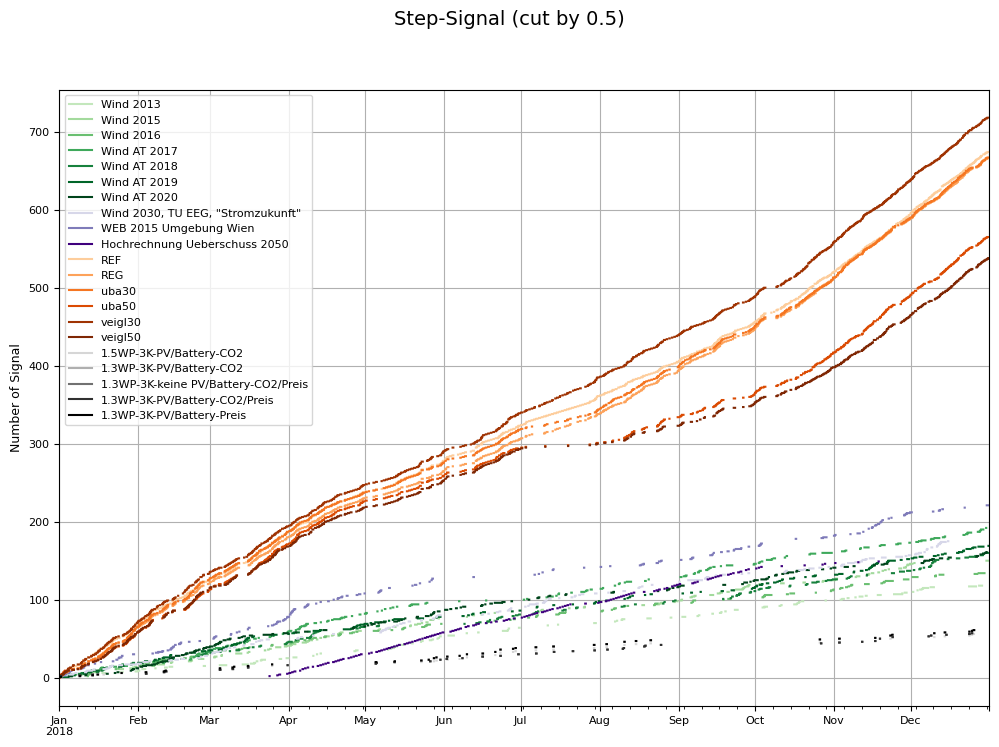

In [35]:
import matplotlib as mpl
from matplotlib import cm
from matplotlib import colors


cmapgreen = mpl.cm.Greens(np.linspace(0,1,20))
cmapgreen = mpl.colors.ListedColormap(cmapgreen[5:,:-1])

cmapblue = mpl.cm.Blues(np.linspace(0,1,20))
cmapblue = mpl.colors.ListedColormap(cmapblue[5:,:-1])

cmaporange = mpl.cm.Oranges(np.linspace(0,1,20))
cmaporange = mpl.colors.ListedColormap(cmaporange[5:,:-1])

cmappurple = mpl.cm.Purples(np.linspace(0,1,20))
cmappurple = mpl.colors.ListedColormap(cmappurple[5:,:-1])

cmapgrey = mpl.cm.Greys(np.linspace(0,1,20))
cmapgrey = mpl.colors.ListedColormap(cmapgrey[5:,:-1])

fig, ax = plt.subplots()
df_step_wind[df_step_wind.columns[0:7]].plot(figsize=(12,8), ylabel="Number of Signal", cmap=cmapgreen, grid=True, ax=ax)
df_step[df_step.columns[3:6]].plot(figsize=(12,8), ylabel="Number of Signal", cmap=cmappurple, grid=True, ax=ax)
df_step[df_step.columns[10:16]].plot(figsize=(12,8), ylabel="Number of Signal", cmap=cmaporange, grid=True, ax=ax)
df_step[df_step.columns[-5:]].plot(figsize=(12,8), ylabel="Number of Signal", cmap=cmapgrey, grid=True, ax=ax)
fig.suptitle('Step-Signal (cut by {})' .format(cut), fontsize=14)
fig.savefig("../data/Plots/cumplot_color_{}.png" .format(cut), dpi=300)

In [36]:
df_step.fillna(0, inplace=True)
df_not.fillna(0, inplace=True)

In [37]:
desc = pd.DataFrame()
desc["Zeitraum mit Signal [h]"] = df_sign.where(df_sign>0).sum()
desc["Nicht-Signal-Zeitraum [h]"] = 8760 - desc["Zeitraum mit Signal [h]"]
desc["Anzahl Signal-Perioden"] = df_step.max()
desc["Durchschnittliche Dauer Signal [h]"] = (desc["Zeitraum mit Signal [h]"]/desc["Anzahl Signal-Perioden"])
desc["Durchschnittliche Dauer Nicht-Signal [h]"] = desc["Nicht-Signal-Zeitraum [h]"]/desc["Anzahl Signal-Perioden"]

desc

,Zeitraum mit Signal [h],Nicht-Signal-Zeitraum [h],Anzahl Signal-Perioden,Durchschnittliche Dauer Signal [h],Durchschnittliche Dauer Nicht-Signal [h]
Wind 2013,1440.0,7320.0,118.0,12.203390,62.033898
Wind 2015,1545.0,7215.0,150.0,10.300000,48.100000
Wind 2016,1454.0,7306.0,134.0,10.850746,54.522388
"Wind 2030, TU EEG, ""Stromzukunft""",1979.0,6781.0,175.0,11.308571,38.748571
WEB 2015 Umgebung Wien,1146.0,7614.0,221.0,5.185520,34.452489
Hochrechnung Ueberschuss 2050,738.0,8022.0,149.0,4.953020,53.838926
Wind AT 2017,1884.0,6876.0,192.0,9.812500,35.812500
Wind AT 2018,1327.0,7433.0,160.0,8.293750,46.456250
Wind AT 2019,2232.0,6528.0,169.0,13.207101,38.627219
Wind AT 2020,1961.0,6799.0,162.0,12.104938,41.969136


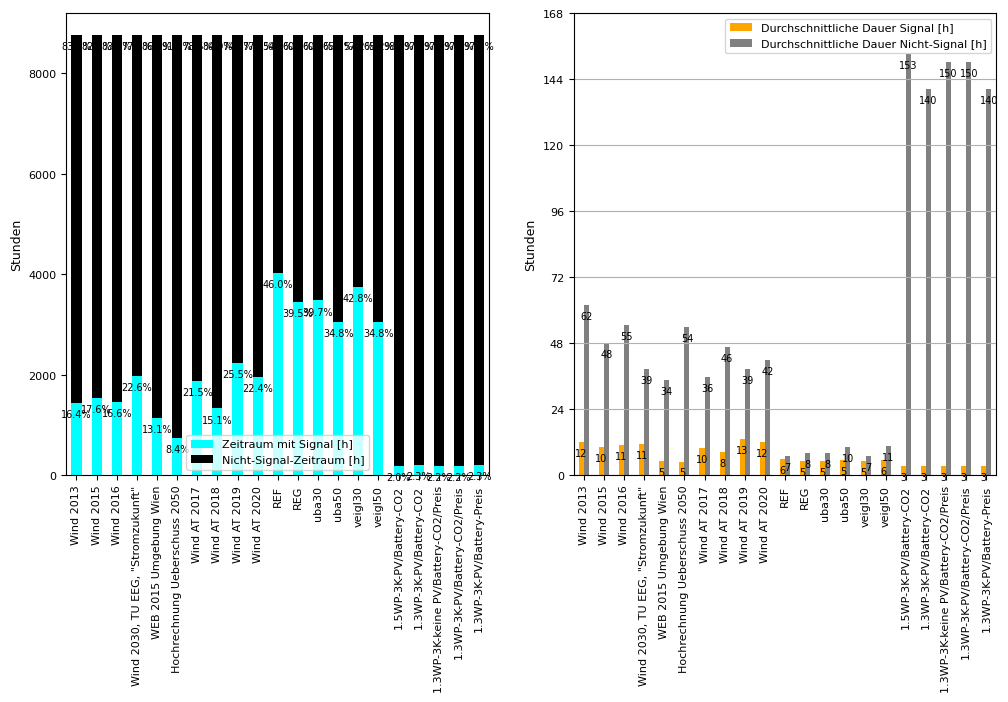

In [38]:
from FLUCCOplus.utils import plot_signal_bars

fig, ax = plot_signal_bars(df_sign, df_sign.columns, ytick_average_max=169, figsize=(12,6))
plt.grid(axis="x")
plt.grid(axis="y")
fig.savefig(f"../data/Plots/descriptive_{cut}.png", dpi=300, bbox_inches='tight')

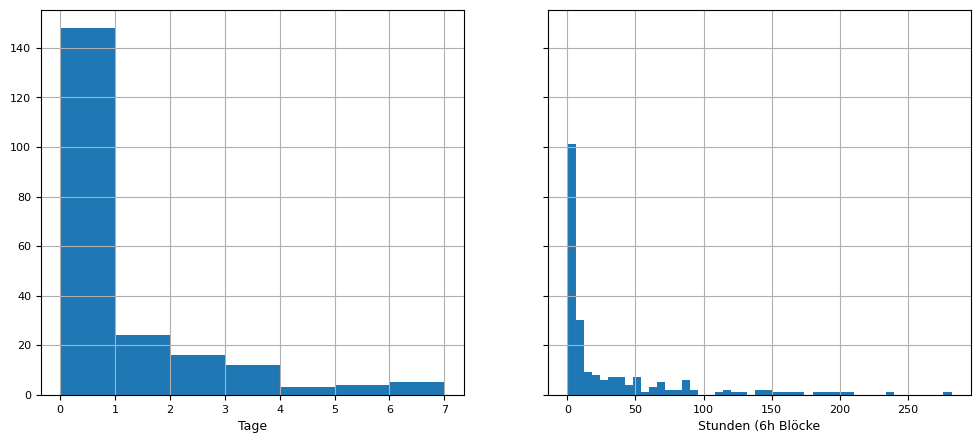

In [39]:
daily = df_not["WEB 2015 Umgebung Wien"].value_counts().sort_index()/24
hourly = df_not["WEB 2015 Umgebung Wien"].value_counts().sort_index()

hours = [6*i for i in range(8*6)]
days = range(8)
fig, ax = plt.subplots(1,2, figsize=(12,5), sharey=True)
daily.hist(bins=days, ax = ax[0])
hourly.hist(bins=hours, ax=ax[1])
ax[0].set_xlabel("Tage")
ax[1].set_xlabel("Stunden (6h Blöcke")
fig.set_label("Nicht-Signals shorter than x days")

In [40]:
df_not

,Wind 2013,Wind 2015,Wind 2016,"Wind 2030, TU EEG, ""Stromzukunft""",WEB 2015 Umgebung Wien,Hochrechnung Ueberschuss 2050,Wind AT 2017,Wind AT 2018,Wind AT 2019,Wind AT 2020,...,REG,uba30,uba50,veigl30,veigl50,1.5WP-3K-PV/Battery-CO2,1.3WP-3K-PV/Battery-CO2,1.3WP-3K-keine PV/Battery-CO2/Preis,1.3WP-3K-PV/Battery-CO2/Preis,1.3WP-3K-PV/Battery-Preis
2018-01-01 00:00:00,0.0,True,True,True,True,True,True,True,True,0.0,...,0.0,0.0,0.0,0.0,0.0,True,True,True,True,True
2018-01-01 01:00:00,0.0,1,1,1,1,1,1,1,1,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
2018-01-01 02:00:00,0.0,1,1,1,1,1,1,1,1,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
2018-01-01 03:00:00,0.0,1,1,1,1,1,1,1,1,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
2018-01-01 04:00:00,0.0,1,1,1,1,1,1,1,1,0.0,...,1.0,1.0,1.0,1.0,0.0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,118.0,151.0,135.0,176.0,222.0,150.0,193.0,161.0,0,162.0,...,0.0,0.0,0.0,0.0,0.0,57.0,62.0,58.0,58.0,62.0
2018-12-31 20:00:00,118.0,151.0,135.0,176.0,222.0,150.0,193.0,161.0,0,162.0,...,0.0,0.0,0.0,0.0,0.0,57.0,62.0,58.0,58.0,62.0
2018-12-31 21:00:00,118.0,151.0,135.0,176.0,222.0,150.0,193.0,161.0,0,162.0,...,0.0,0.0,0.0,0.0,0.0,57.0,62.0,58.0,58.0,62.0
2018-12-31 22:00:00,118.0,151.0,135.0,176.0,222.0,150.0,193.0,161.0,0,162.0,...,0.0,0.0,0.0,0.0,0.0,57.0,62.0,58.0,58.0,62.0


In [41]:
df_hourly_not = pd.DataFrame()
for c in df_not.columns:
    df_hourly_not[c]=(df_not[c]).value_counts(sort=True)
df_hourly_not.sort_index()

,Wind 2013,Wind 2015,Wind 2016,"Wind 2030, TU EEG, ""Stromzukunft""",WEB 2015 Umgebung Wien,Hochrechnung Ueberschuss 2050,Wind AT 2017,Wind AT 2018,Wind AT 2019,Wind AT 2020,...,REG,uba30,uba50,veigl30,veigl50,1.5WP-3K-PV/Battery-CO2,1.3WP-3K-PV/Battery-CO2,1.3WP-3K-keine PV/Battery-CO2/Preis,1.3WP-3K-PV/Battery-CO2/Preis,1.3WP-3K-PV/Battery-Preis
0.0,1440,1545,1454,1979,1146,738,1884,1327,2232,1961,...,3457,3478,3050,3752,3048,179.0,200.0,190.0,190.0,200.0
1.0,58,42,70,5,10,1933,43,32,13,81,...,4,4,3,4,1,12.0,12.0,6.0,6.0,12.0
2.0,3,19,182,2,5,45,2,7,8,130,...,4,4,3,3,5,174.0,173.0,3.0,3.0,173.0
3.0,12,74,1,12,18,71,4,1,1,3,...,5,5,1,5,2,115.0,115.0,175.0,175.0,115.0
4.0,105,9,7,23,8,17,1,112,41,189,...,5,5,4,5,4,99.0,43.0,114.0,114.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114.0,1,2,59,1,4,43,83,12,167,26,...,4,6,17,1,2,NaN,NaN,NaN,NaN,NaN
115.0,23,2,7,116,18,21,7,44,11,37,...,2,1,4,2,1,NaN,NaN,NaN,NaN,NaN
116.0,331,7,33,7,85,20,90,1,2,1,...,3,6,1,1,23,NaN,NaN,NaN,NaN,NaN
117.0,28,16,16,18,4,23,14,181,9,17,...,11,1,1,11,34,NaN,NaN,NaN,NaN,NaN


In [42]:
#fig, ax = plt.subplots()
# df_hourly_not.hist(bins=hours, alpha=0.8, sharey=True, sharex=True, figsize=(12,6))
#fig.savefig("hists.png", dpi=300)

Text(0.5, 0, 'Nicht-Signale kürzer als (6h Blöcke)')

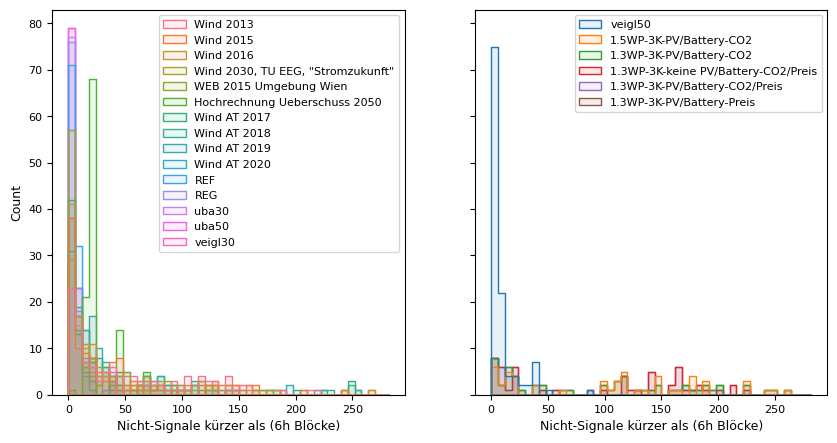

In [43]:
fig, ax = plt.subplots(1,2, figsize=(10,5), sharey=True)
c1 = df_hourly_not.columns[:-6]
c2 = df_hourly_not.columns[-6:]

sns.histplot(df_hourly_not[c1], kde=False,alpha=0.1,linewidth=1,
             fill=True,
             cumulative=False,
             element="step",
             bins=hours, ax=ax[0])
sns.histplot(df_hourly_not[c2], kde=False,alpha=0.1,linewidth=1,
             fill=True,
             cumulative=False,
             element="step",
             bins=hours, ax=ax[1])

ax[0].set_xlabel("Nicht-Signale kürzer als (6h Blöcke)")
ax[1].set_xlabel("Nicht-Signale kürzer als (6h Blöcke)")
#fig.savefig("all_hists_50.png", dpi=300)

doku daziu:
https://seaborn.pydata.org/generated/seaborn.histplot.html

In [44]:
df = normalize(df)
peexcel_path = config.DATA_PROCESSED / Path("peexcel_normalized.csv")
df.to_csv(peexcel_path)

In [45]:
year = 2018

In [46]:
p = config.DATA_PROCESSED / Path("WEB_normalized.csv")
df_web = pd.read_csv(p, delimiter=";", parse_dates=True, index_col=0, decimal=".", encoding="cp850")
df_EA = df_web[df_web.index.year == year]
df_EA

,Neuhof I,Neuhof III,Maustrenk,STERN I,STERN II,STERN III
Datetime UCT,,,,,,
2018-01-01 00:00:00,0.370625,0.423402,0.691714,0.225750,0.315563,0.287625
2018-01-01 01:00:00,0.400833,0.495427,0.694071,0.144187,0.201469,0.189000
2018-01-01 02:00:00,0.450625,0.566986,0.936000,0.243375,0.233500,0.285375
2018-01-01 03:00:00,0.562500,0.584189,0.594857,0.395062,0.264594,0.265125
2018-01-01 04:00:00,0.273125,0.337316,0.312857,0.669188,0.564125,0.504188
...,...,...,...,...,...,...
2018-12-31 19:00:00,0.093333,0.076680,0.123429,0.000000,0.000000,0.000000
2018-12-31 20:00:00,0.101458,0.080857,0.146571,0.000000,0.000000,0.000000
2018-12-31 21:00:00,0.231458,0.345099,0.081429,0.000000,0.000000,0.000000


In [47]:

#dates = np.arange("2020-01-01", "2021-01-01 00:00", dtype="datetime64[h]")
df_pee = pd.read_csv(peexcel_path, index_col=0)
df_pee.index = dates
df_EA = pd.concat([df_EA, df_pee[["WEB 2015 Umgebung Wien", f"Wind AT {year}"]]], axis=1)
df_EA

,Neuhof I,Neuhof III,Maustrenk,STERN I,STERN II,STERN III,WEB 2015 Umgebung Wien,Wind AT 2018
2018-01-01 00:00:00,0.370625,0.423402,0.691714,0.225750,0.315563,0.287625,0.000000,0.313971
2018-01-01 01:00:00,0.400833,0.495427,0.694071,0.144187,0.201469,0.189000,0.000000,0.285723
2018-01-01 02:00:00,0.450625,0.566986,0.936000,0.243375,0.233500,0.285375,0.000000,0.318035
2018-01-01 03:00:00,0.562500,0.584189,0.594857,0.395062,0.264594,0.265125,0.000000,0.237349
2018-01-01 04:00:00,0.273125,0.337316,0.312857,0.669188,0.564125,0.504188,0.000000,0.155524
...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,0.093333,0.076680,0.123429,0.000000,0.000000,0.000000,0.066582,0.244374
2018-12-31 20:00:00,0.101458,0.080857,0.146571,0.000000,0.000000,0.000000,0.052745,0.187702
2018-12-31 21:00:00,0.231458,0.345099,0.081429,0.000000,0.000000,0.000000,0.026788,0.174650
2018-12-31 22:00:00,0.037292,0.182073,0.150000,0.000000,0.000000,0.000000,0.002470,0.145799


Text(0.5, 0.98, 'Freigabesignal WEB (2018)')

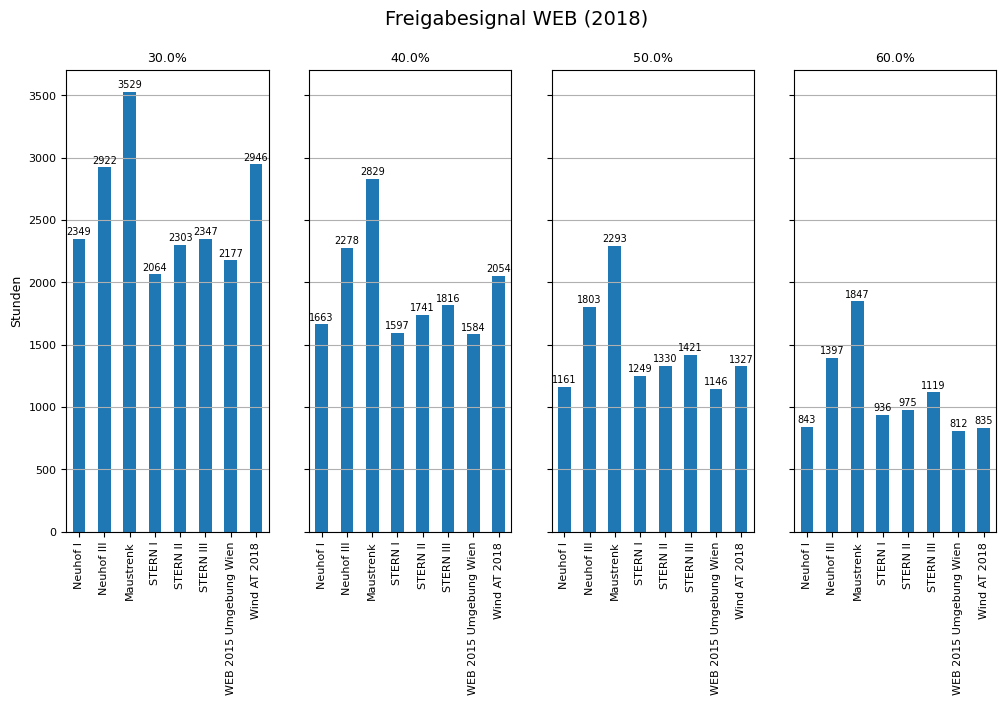

In [48]:
cutoffs = [0.3, 0.4, 0.5, 0.6]
anzahl_EA = pd.DataFrame()

fig, ax = plt.subplots(1, len(cutoffs), sharey=True, figsize=(12,6))
for i, x in enumerate(cutoffs):
    sig = df_EA.where(df_EA > x)
    sig.count().plot(kind="bar", ax=ax[i], title=f"{x*100}%")
    anzahl_EA[x] = sig.count()
    ax[i].grid(axis='y')
    ax[i].set_ylabel("Stunden")
    for p in ax[i].patches:
      ax[i].annotate("{:.0f}" .format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=7, color='black', xytext=(0, 5), textcoords='offset points')


fig.suptitle(f'Freigabesignal WEB ({year})', fontsize=14)
#fig.savefig(f"../data/Plots/Freigabe-threshold_WEB_{year}.png", dpi=300, bbox_inches="tight")

In [49]:
df_EA > 0.5

,Neuhof I,Neuhof III,Maustrenk,STERN I,STERN II,STERN III,WEB 2015 Umgebung Wien,Wind AT 2018
2018-01-01 00:00:00,False,False,True,False,False,False,False,False
2018-01-01 01:00:00,False,False,True,False,False,False,False,False
2018-01-01 02:00:00,False,True,True,False,False,False,False,False
2018-01-01 03:00:00,True,True,True,False,False,False,False,False
2018-01-01 04:00:00,False,False,False,True,True,True,False,False
...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,False,False,False,False,False,False,False,False
2018-12-31 20:00:00,False,False,False,False,False,False,False,False
2018-12-31 21:00:00,False,False,False,False,False,False,False,False
2018-12-31 22:00:00,False,False,False,False,False,False,False,False


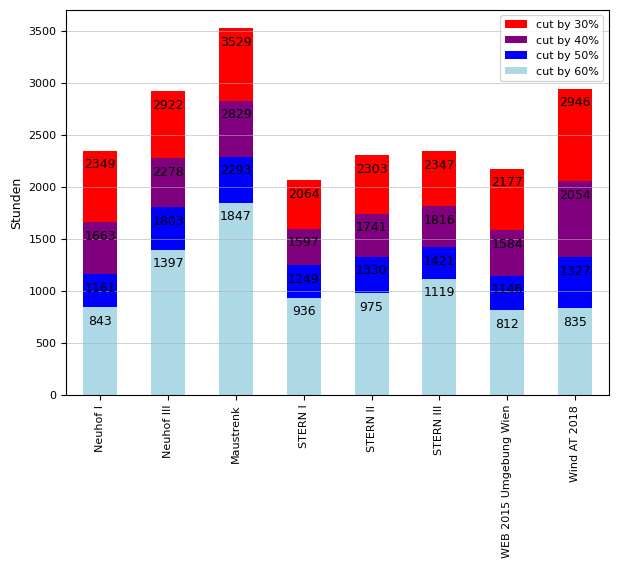

In [50]:
cutoffs = [0.3, 0.4, 0.5, 0.6]
anzahl_EA = pd.DataFrame()
fig, ax = plt.subplots(1, figsize=(7,5))
#for i, x in enumerate(cutoffs):
sig_30 = df_EA.where(df_EA > 0.3)
sig_40 = df_EA.where(df_EA > 0.4)
sig_50 = df_EA.where(df_EA > 0.5)
sig_60 = df_EA.where(df_EA > 0.6)
width = 0.7
#sig_30.count().plot(kind="bar", ax=ax, width = width, color='darkblue', label='cut by 30 %')
#sig_40.count().plot(kind="bar", ax=ax, width = width*0.85, color='mediumblue', label='cut by 40 %')
#sig_50.count().plot(kind="bar", ax=ax, width = width*0.7, color='royalblue', label='cut by 50 %')
#sig_60.count().plot(kind="bar", ax=ax, width = width*0.55, color='lightblue', label='cut by 60 %')

sig_30.count().plot(kind="bar", ax=ax, color="red", ylabel="Stunden", label="cut by 30%")
sig_40.count().plot( kind="bar", ax=ax, color="purple", label="cut by 40%")
sig_50.count().plot(kind="bar", ax=ax, color="blue", label="cut by 50%")
sig_60.count().plot(kind="bar", ax=ax, color="lightblue", label="cut by 60%")
ax.grid(axis='y', linewidth="0.4")
anzahl_EA_30 = sig_30.count()
for p in ax.patches:
      ax.annotate("{:.0f}" .format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, -10), textcoords='offset points')
ax.set_ylabel("Stunden")

plt.legend()
plt.show()
fig.savefig(f"../data/Plots/freigabestunden_overlapped_web_{year}.png", dpi=300, bbox_inches="tight")

In [51]:

df_sign_EA = pd.DataFrame()
for c in df_EA.columns:
    df_sign_EA[c] = df_EA[c].map(lambda x: -1 if x < cut else 1)
df_sign_EA

,Neuhof I,Neuhof III,Maustrenk,STERN I,STERN II,STERN III,WEB 2015 Umgebung Wien,Wind AT 2018
2018-01-01 00:00:00,-1,-1,1,-1,-1,-1,-1,-1
2018-01-01 01:00:00,-1,-1,1,-1,-1,-1,-1,-1
2018-01-01 02:00:00,-1,1,1,-1,-1,-1,-1,-1
2018-01-01 03:00:00,1,1,1,-1,-1,-1,-1,-1
2018-01-01 04:00:00,-1,-1,-1,1,1,1,-1,-1
...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,-1,-1,-1,-1,-1,-1,-1,-1
2018-12-31 20:00:00,-1,-1,-1,-1,-1,-1,-1,-1
2018-12-31 21:00:00,-1,-1,-1,-1,-1,-1,-1,-1
2018-12-31 22:00:00,-1,-1,-1,-1,-1,-1,-1,-1


In [52]:

df_step_EA = pd.DataFrame()
df_not_EA = pd.DataFrame()

for b in df_sign_EA.columns:
    df_step_EA[b] = df_sign_EA[b].shift(1).ne(df_sign_EA[b]).where(df_sign_EA[b] == 1).cumsum()
    df_not_EA[b] = df_sign_EA[b].shift(1).ne(df_sign_EA[b]).where(df_sign_EA[b] == -1).cumsum()

df_step_EA.iloc[0, :] = 0
df_step_EA

,Neuhof I,Neuhof III,Maustrenk,STERN I,STERN II,STERN III,WEB 2015 Umgebung Wien,Wind AT 2018
2018-01-01 00:00:00,0,0,0,0,0,0,0,0
2018-01-01 01:00:00,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
2018-01-01 02:00:00,NaN,1.0,1,NaN,NaN,NaN,NaN,NaN
2018-01-01 03:00:00,1.0,1.0,1,NaN,NaN,NaN,NaN,NaN
2018-01-01 04:00:00,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


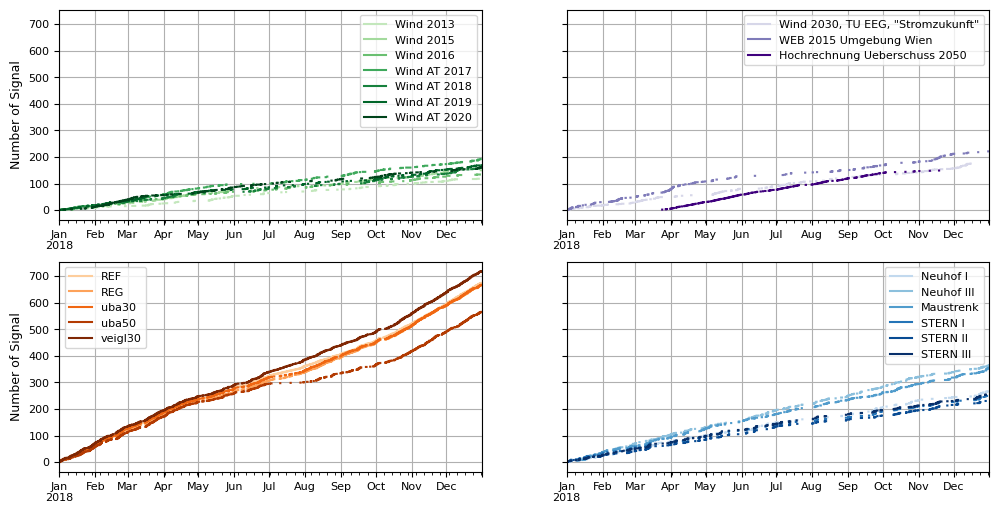

In [53]:
import matplotlib as mpl
from matplotlib import cm
from matplotlib import colors

fig, ax = plt.subplots(2, 2, sharey=True)

df_step_wind[df_step_wind.columns[0:7]].plot(figsize=(12,6), ylabel="Number of Signal", cmap=cmapgreen, grid=True, ax=ax[0,0])
df_step_R[df_step_R.columns[0:3]].plot(figsize=(12,6), ylabel="Number of Signal", cmap=cmappurple, grid=True, ax=ax[0,1])
df_step_Max[df_step_Max.columns[0:5]].plot(figsize=(12,6), ylabel="Number of Signal", cmap=cmaporange, grid=True, ax=ax[1, 0])
df_step_EA[df_step_EA.columns[0:6]].plot(figsize=(12, 6), ylabel="Number of Signal", cmap=cmapblue, grid=True, ax=ax[1, 1])

fig.savefig(f"../data/Plots/cumplot_all_{cut}_{year}.png", dpi=300)

In [54]:
df_EA.where(df_EA>0.5)

,Neuhof I,Neuhof III,Maustrenk,STERN I,STERN II,STERN III,WEB 2015 Umgebung Wien,Wind AT 2018
2018-01-01 00:00:00,NaN,NaN,0.691714,NaN,NaN,NaN,NaN,NaN
2018-01-01 01:00:00,NaN,NaN,0.694071,NaN,NaN,NaN,NaN,NaN
2018-01-01 02:00:00,NaN,0.566986,0.936000,NaN,NaN,NaN,NaN,NaN
2018-01-01 03:00:00,0.5625,0.584189,0.594857,NaN,NaN,NaN,NaN,NaN
2018-01-01 04:00:00,NaN,NaN,NaN,0.669188,0.564125,0.504188,NaN,NaN
...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
cuts = []
for i in range(30,61):
    cuts.append(i/100)
df_web15 = df_web[df_web.index.year == 2015]
sigEA15 = pd.DataFrame()
anzahlEA15 = pd.DataFrame()
df_web16 = df_web[df_web.index.year == 2016]
sigEA16 = pd.DataFrame()
anzahlEA16 = pd.DataFrame()
df_web17 = df_web[df_web.index.year == 2017]
sigEA17 = pd.DataFrame()
anzahlEA17 = pd.DataFrame()
df_web18 = df_web[df_web.index.year == 2018]
sigEA18 = pd.DataFrame()
anzahlEA18 = pd.DataFrame()
df_web19 = df_web[df_web.index.year == 2019]
sigEA19 = pd.DataFrame()
anzahlEA19 = pd.DataFrame()
sigdf = pd.DataFrame()
anzahldf = pd.DataFrame()
#fig, ax = plt.subplots(1, len(cuts), figsize=(16,7))
for i, x in enumerate(cuts):
    sigEA15 = df_web15.where(df_web15>x)
    anzahlEA15[x] = sigEA15.count()
    sigEA16 = df_web16.where(df_web16>x)
    anzahlEA16[x] = sigEA16.count()
    sigEA17 = df_web17.where(df_web17>x)
    anzahlEA17[x] = sigEA17.count()
    sigEA18 = df_web18.where(df_web18>x)
    anzahlEA18[x] = sigEA18.count()
    sigEA19 = df_web19.where(df_web19>x)
    anzahlEA19[x] = sigEA19.count()
    sigdf = df.where(df>x)
    anzahldf[x] = sigdf.count()

In [56]:
anzahlEA17

,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,...,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.60
Neuhof I,2931,2857,2775,2699,2638,2566,2498,2442,2379,2307,...,1685,1632,1577,1544,1498,1461,1411,1368,1336,1310
Neuhof III,3487,3412,3356,3299,3233,3168,3109,3046,2988,2935,...,2328,2290,2247,2207,2162,2130,2078,2033,1992,1954
Maustrenk,3859,3777,3698,3638,3575,3513,3446,3374,3316,3257,...,2562,2504,2453,2395,2331,2278,2217,2178,2125,2069
STERN I,2439,2382,2329,2273,2217,2157,2089,2040,1991,1943,...,1384,1345,1312,1273,1232,1213,1181,1156,1114,1072
STERN II,2511,2452,2381,2309,2241,2169,2112,2057,1992,1934,...,1274,1231,1194,1144,1096,1059,1023,988,961,940
STERN III,2846,2781,2728,2657,2594,2537,2468,2423,2364,2311,...,1710,1666,1622,1575,1534,1493,1456,1420,1377,1336


In [57]:
anzahl_EA_Wind = pd.concat([anzahl_EA[0:6], anzahldf[0:3], anzahldf[6:10]], axis=0)
anzahl_EA_Wind

,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,...,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.60
Wind 2013,2805,2704,2614,2531,2460,2382,2282,2212,2136,2066,...,1394,1355,1308,1278,1241,1208,1172,1134,1089,1050
Wind 2015,2987,2884,2794,2722,2651,2547,2476,2380,2308,2243,...,1499,1454,1407,1359,1312,1274,1222,1180,1135,1085
Wind 2016,2766,2680,2579,2492,2408,2347,2277,2192,2123,2066,...,1410,1357,1314,1275,1235,1199,1156,1115,1061,1006
Wind AT 2017,3405,3309,3238,3144,3070,2987,2919,2854,2772,2688,...,1815,1743,1681,1621,1565,1505,1437,1374,1313,1263
Wind AT 2018,2946,2843,2762,2683,2588,2489,2402,2310,2222,2140,...,1257,1212,1165,1115,1056,1011,961,917,875,835
Wind AT 2019,3525,3432,3358,3299,3210,3139,3083,3009,2938,2873,...,2170,2120,2060,2003,1942,1881,1841,1794,1747,1709
Wind AT 2020,3214,3149,3079,3006,2920,2848,2789,2723,2670,2614,...,1919,1876,1825,1779,1733,1683,1632,1566,1504,1451


In [58]:
anzahldf.T

,Wind 2013,Wind 2015,Wind 2016,"Wind 2030, TU EEG, ""Stromzukunft""",WEB 2015 Umgebung Wien,Hochrechnung Ueberschuss 2050,Wind AT 2017,Wind AT 2018,Wind AT 2019,Wind AT 2020,...,REG,uba30,uba50,veigl30,veigl50,1.5WP-3K-PV/Battery-CO2,1.3WP-3K-PV/Battery-CO2,1.3WP-3K-keine PV/Battery-CO2/Preis,1.3WP-3K-PV/Battery-CO2/Preis,1.3WP-3K-PV/Battery-Preis
0.30,2805,2987,2766,3312,2177,1796,3405,2946,3525,3214,...,3457,3478,3050,3752,3048,179,200,190,190,200
0.31,2704,2884,2680,3223,2119,1726,3309,2843,3432,3149,...,3457,3478,3050,3752,3048,179,200,190,190,200
0.32,2614,2794,2579,3141,2059,1648,3238,2762,3358,3079,...,3457,3478,3050,3752,3048,179,200,190,190,200
0.33,2531,2722,2492,3066,1993,1612,3144,2683,3299,3006,...,3457,3478,3050,3752,3048,179,200,190,190,200
0.34,2460,2651,2408,2978,1927,1542,3070,2588,3210,2920,...,3457,3478,3050,3752,3048,179,200,190,190,200
0.35,2382,2547,2347,2912,1872,1504,2987,2489,3139,2848,...,3457,3478,3050,3752,3048,179,200,190,190,200
0.36,2282,2476,2277,2846,1814,1418,2919,2402,3083,2789,...,3457,3478,3050,3752,3048,179,200,190,190,200
0.37,2212,2380,2192,2792,1750,1369,2854,2310,3009,2723,...,3457,3478,3050,3752,3048,179,200,190,190,200
0.38,2136,2308,2123,2727,1687,1314,2772,2222,2938,2670,...,3457,3478,3050,3752,3048,179,200,190,190,200
0.39,2066,2243,2066,2648,1633,1244,2688,2140,2873,2614,...,3457,3478,3050,3752,3048,179,200,190,190,200


In [59]:
#anzahl_EA_Wind[0:3].T.plot(figsize=(13,6), grid=True, ylim=(0,4000), xlabel="Cutoffs", ylabel="Anzahl der FreigabeSTUNDEN im Jahr", cmap='RdYlGn')
#plt.suptitle('WEB-Anlagen 2019', fontsize=14)
#plt.savefig(f"../data/Plots/curve_WEB_{year}.png", dpi=300, bbox_inches="tight")

## 2015

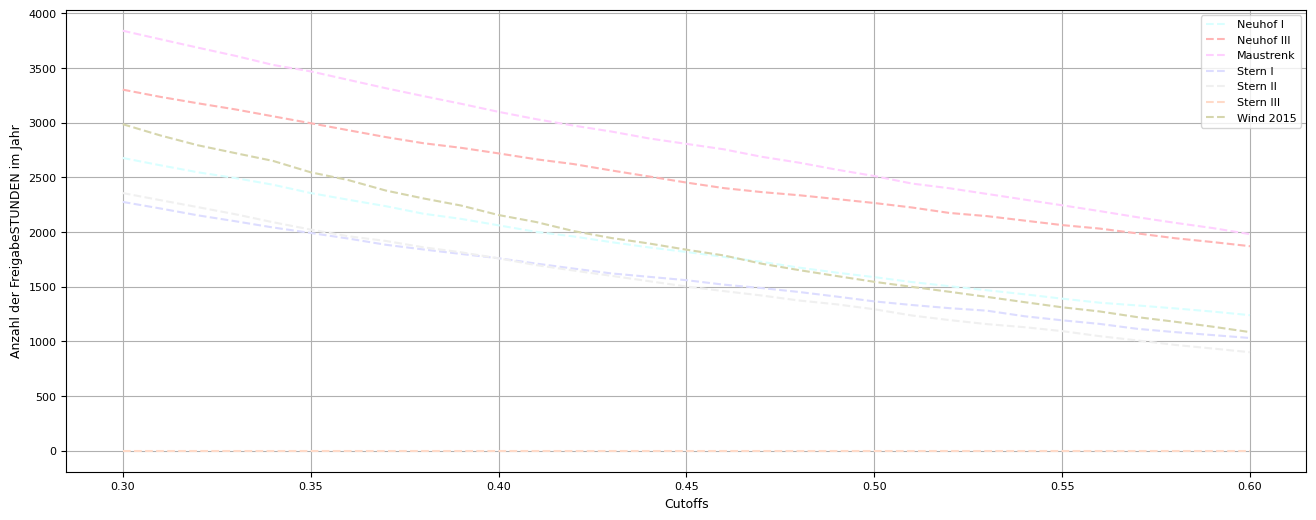

In [60]:
# Jahr 15 linienstyle='-.', Jahr 16 linienstyle='--', Jahr 17 linienstyle='-', Jahr 18 linienstyle=".",

NeuhofI15 = anzahlEA15[0:1].T
NeuhofIII15 = anzahlEA15[1:2].T
Maustrenk15 = anzahlEA15[2:3].T
SternI15 = anzahlEA15[3:4].T
SternII15 = anzahlEA15[4:5].T
SternIII15 = anzahlEA15[5:6].T
#Wind13 = anzahldf[0:1].T
Wind15 = anzahldf[1:2].T
Wind16 = anzahldf[2:3].T
Wind17 = anzahldf[6:7].T
Wind18 = anzahldf[7:8].T
Wind19 = anzahldf[8:9].T
#Wind20 = anzahldf[9:10].T

fig = plt.figure(figsize=(16,6))
ax = fig.gca()
plt.plot(NeuhofI15, color="#D9FFFF", linestyle="--")
plt.plot(NeuhofIII15, color="#FFB5B5", linestyle="--")
plt.plot(Maustrenk15, color="#FFD0FF", linestyle="--")
plt.plot(SternI15, color="#DDDDFF", linestyle="--")
plt.plot(SternII15, color="#F0F0F0", linestyle="--")
plt.plot(SternIII15, color="#FFDAC8", linestyle="--")
plt.plot(Wind15, color="#D6D6AD", linestyle="--")
plt.grid()
ax.set_yticks(np.arange(0, 4100, 500))
plt.xlabel('Cutoffs')
plt.ylabel('Anzahl der FreigabeSTUNDEN im Jahr')
plt.legend(["Neuhof I", "Neuhof III", "Maustrenk", "Stern I", "Stern II", "Stern III", "Wind 2015"])
plt.savefig("../data/Plots/curve_2015.png", dpi=300, bbox_inches="tight")


## 2016

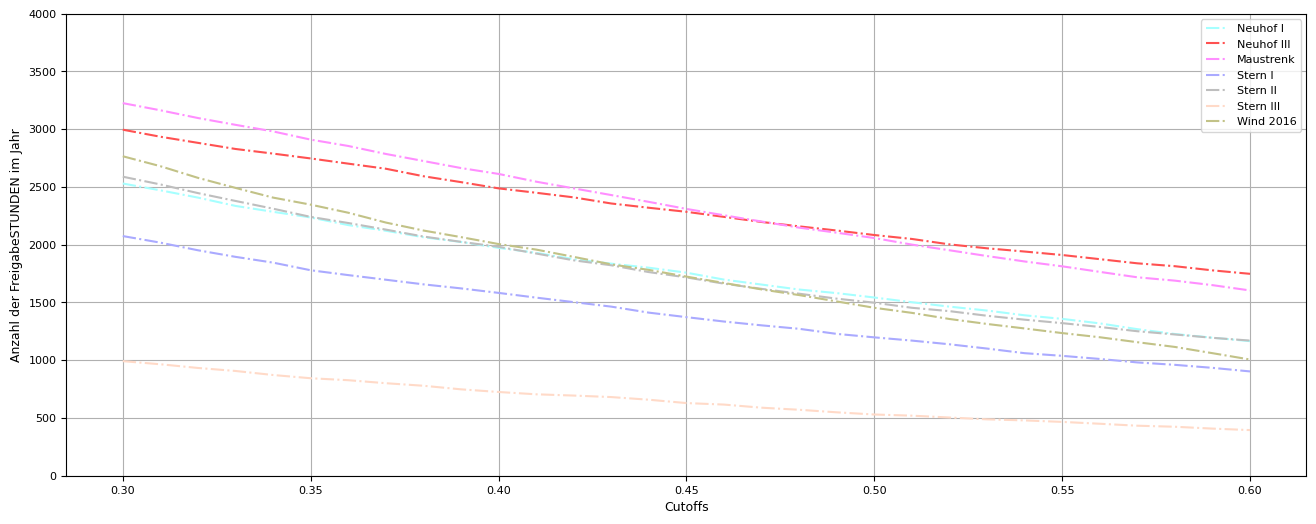

In [61]:
# Jahr 15 linienstyle='--', Jahr 16 linienstyle='-.', Jahr 17 linienstyle='-', Jahr 18 linienstyle=".",

NeuhofI16 = anzahlEA16[0:1].T
NeuhofIII16 = anzahlEA16[1:2].T
Maustrenk16 = anzahlEA16[2:3].T
SternI16 = anzahlEA16[3:4].T
SternII16 = anzahlEA16[4:5].T
SternIII16 = anzahlEA16[5:6].T
#Wind13 = anzahldf[0:1].T
Wind15 = anzahldf[1:2].T
Wind16 = anzahldf[2:3].T
Wind17 = anzahldf[6:7].T
Wind18 = anzahldf[7:8].T
Wind19 = anzahldf[8:9].T
#Wind20 = anzahldf[9:10].T

fig = plt.figure(figsize=(16,6))
ax = fig.gca()
plt.plot(NeuhofI16, color="#A6FFFF", linestyle="-.")
plt.plot(NeuhofIII16, color="#FF5151", linestyle="-.")
plt.plot(Maustrenk16, color="#FF8EFF", linestyle="-.")
plt.plot(SternI16, color="#AAAAFF", linestyle="-.")
plt.plot(SternII16, color="#BEBEBE", linestyle="-.")
plt.plot(SternIII16, color="#FFDAC8", linestyle="-.")
plt.plot(Wind16, color="#C2C287", linestyle="-.")
plt.grid()
ax.set_yticks(np.arange(0, 4100, 500))
plt.xlabel('Cutoffs')
plt.ylabel('Anzahl der FreigabeSTUNDEN im Jahr')
plt.legend(["Neuhof I", "Neuhof III", "Maustrenk", "Stern I", "Stern II", "Stern III", "Wind 2016"])
plt.savefig("../data/Plots/curve_2016.png", dpi=300, bbox_inches="tight")

## 2017

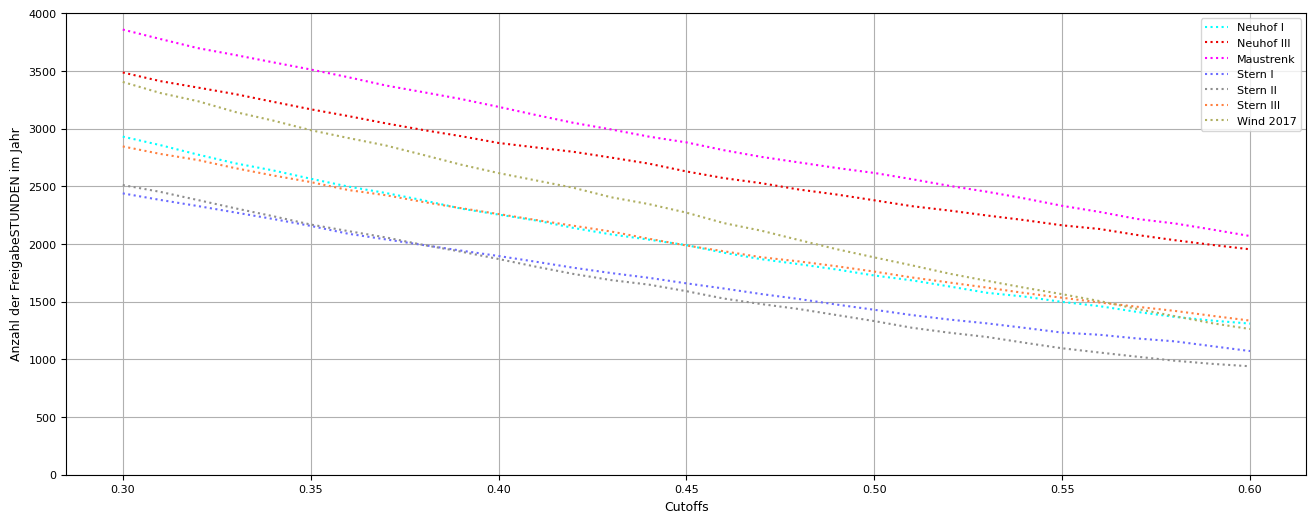

In [62]:
# Jahr 15 linienstyle='--', Jahr 16 linienstyle='-.', Jahr 17 linienstyle='.', Jahr 18 linienstyle="-",

NeuhofI17 = anzahlEA17[0:1].T
NeuhofIII17 = anzahlEA17[1:2].T
Maustrenk17 = anzahlEA17[2:3].T
SternI17 = anzahlEA17[3:4].T
SternII17 = anzahlEA17[4:5].T
SternIII17 = anzahlEA17[5:6].T
#Wind13 = anzahldf[0:1].T
Wind15 = anzahldf[1:2].T
Wind16 = anzahldf[2:3].T
Wind17 = anzahldf[6:7].T
Wind18 = anzahldf[7:8].T
Wind19 = anzahldf[8:9].T
#Wind20 = anzahldf[9:10].T

fig = plt.figure(figsize=(16,6))
ax = fig.gca()
plt.plot(NeuhofI17, color="#00FFFF", linestyle=":")
plt.plot(NeuhofIII17, color="#EA0000", linestyle=":")
plt.plot(Maustrenk17, color="#FF00FF", linestyle=":")
plt.plot(SternI17, color="#6A6AFF", linestyle=":")
plt.plot(SternII17, color="#8E8E8E", linestyle=":")
plt.plot(SternIII17, color="#FF8040", linestyle=":")
plt.plot(Wind17, color="#AFAF61", linestyle=":")
plt.grid()
ax.set_yticks(np.arange(0, 4100, 500))
plt.xlabel('Cutoffs')
plt.ylabel('Anzahl der FreigabeSTUNDEN im Jahr')
plt.legend(["Neuhof I", "Neuhof III", "Maustrenk", "Stern I", "Stern II", "Stern III", "Wind 2017"])
plt.savefig("../data/Plots/curve_2017.png", dpi=300, bbox_inches="tight")

## 2018

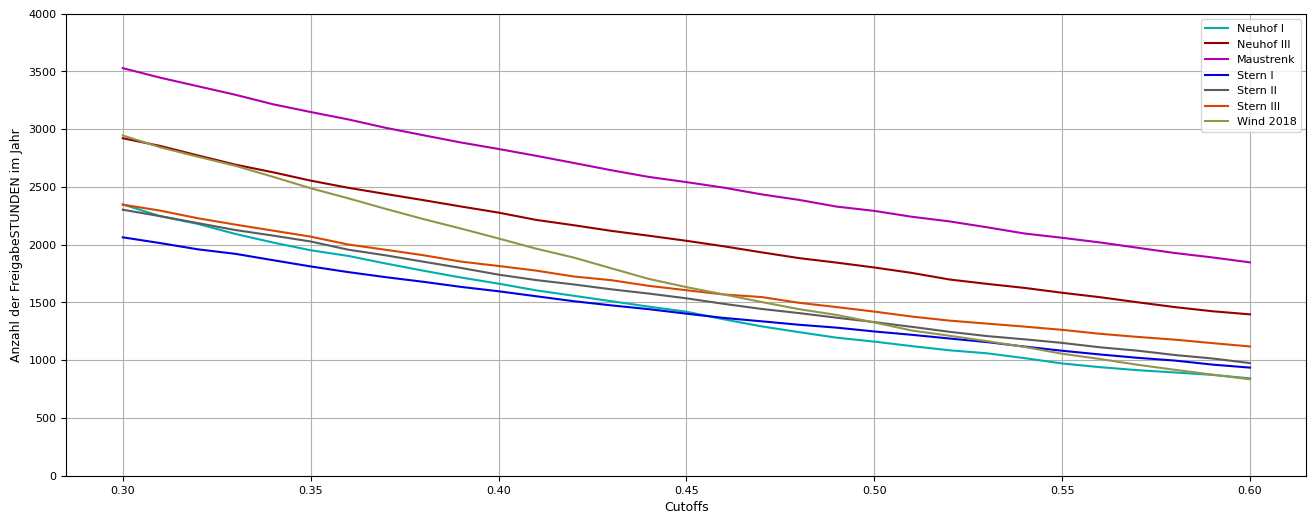

In [63]:
NeuhofI18 = anzahlEA18[0:1].T
NeuhofIII18 = anzahlEA18[1:2].T
Maustrenk18 = anzahlEA18[2:3].T
SternI18 = anzahlEA18[3:4].T
SternII18 = anzahlEA18[4:5].T
SternIII18 = anzahlEA18[5:6].T
#Wind13 = anzahldf[0:1].T
Wind15 = anzahldf[1:2].T
Wind16 = anzahldf[2:3].T
Wind17 = anzahldf[6:7].T
Wind18 = anzahldf[7:8].T
Wind19 = anzahldf[8:9].T
#Wind20 = anzahldf[9:10].T

fig = plt.figure(figsize=(16,6))
ax = fig.gca()
plt.plot(NeuhofI18, color="#00AEAE", linestyle="-")
plt.plot(NeuhofIII18, color="#930000", linestyle="-")
plt.plot(Maustrenk18, color="#AE00AE", linestyle="-")
plt.plot(SternI18, color="#0000E3", linestyle="-")
plt.plot(SternII18, color="#5B5B5B", linestyle="-")
plt.plot(SternIII18, color="#D94600", linestyle="-")
plt.plot(Wind18, color="#949449", linestyle="-")
plt.grid()
ax.set_yticks(np.arange(0, 4100, 500))
plt.xlabel('Cutoffs')
plt.ylabel('Anzahl der FreigabeSTUNDEN im Jahr')
plt.legend(["Neuhof I", "Neuhof III", "Maustrenk", "Stern I", "Stern II", "Stern III", "Wind 2018"])
plt.savefig("../data/Plots/curve_2018.png", dpi=300, bbox_inches="tight")

## 2019

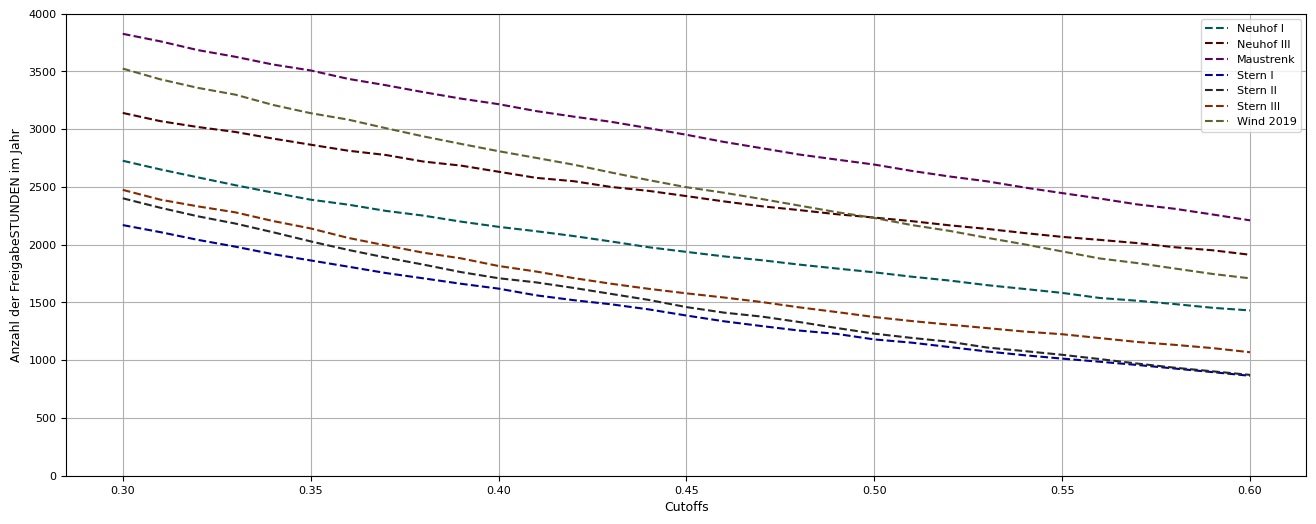

In [64]:
NeuhofI19 = anzahlEA19[0:1].T
NeuhofIII19 = anzahlEA19[1:2].T
Maustrenk19 = anzahlEA19[2:3].T
SternI19 = anzahlEA19[3:4].T
SternII19 = anzahlEA19[4:5].T
SternIII19 = anzahlEA19[5:6].T
#Wind13 = anzahldf[0:1].T
Wind15 = anzahldf[1:2].T
Wind16 = anzahldf[2:3].T
Wind17 = anzahldf[6:7].T
Wind18 = anzahldf[7:8].T
Wind19 = anzahldf[8:9].T
#Wind20 = anzahldf[9:10].T

fig = plt.figure(figsize=(16,6))
ax = fig.gca()
plt.plot(NeuhofI19, color="#005757", linestyle="--")
plt.plot(NeuhofIII19, color="#4D0000", linestyle="--")
plt.plot(Maustrenk19, color="#5E005E", linestyle="--")
plt.plot(SternI19, color="#000093", linestyle="--")
plt.plot(SternII19, color="#272727", linestyle="--")
plt.plot(SternIII19, color="#842B00", linestyle="--")
plt.plot(Wind19, color="#616130", linestyle="--")
plt.grid()
ax.set_yticks(np.arange(0, 4100, 500))
plt.xlabel('Cutoffs')
plt.ylabel('Anzahl der FreigabeSTUNDEN im Jahr')
plt.legend(["Neuhof I", "Neuhof III", "Maustrenk", "Stern I", "Stern II", "Stern III", "Wind 2019"])
plt.savefig("../data/Plots/curve_2019.png", dpi=300, bbox_inches="tight")

## All years

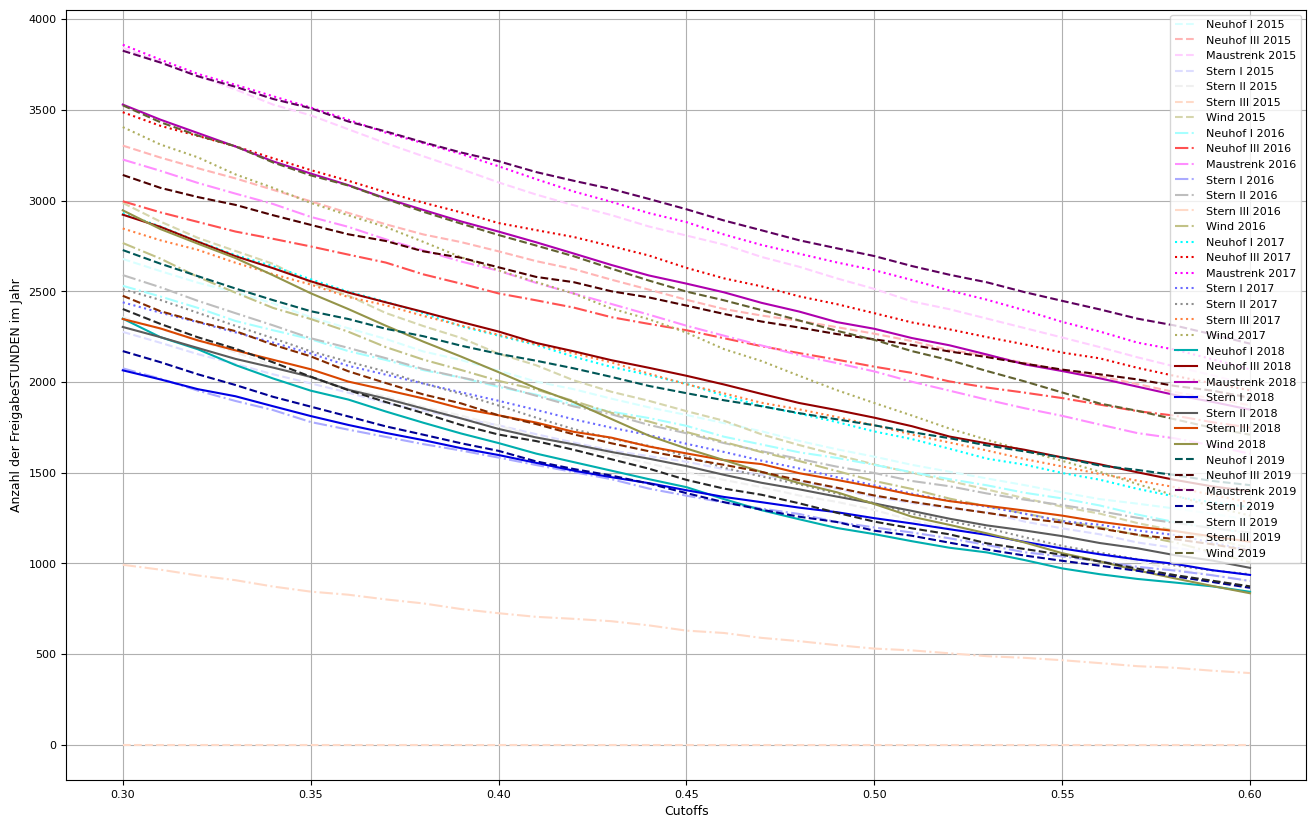

In [65]:
fig = plt.figure(figsize=(16,10))
ax = fig.gca()
plt.plot(NeuhofI15, color="#D9FFFF", linestyle="--")
plt.plot(NeuhofIII15, color="#FFB5B5", linestyle="--")
plt.plot(Maustrenk15, color="#FFD0FF", linestyle="--")
plt.plot(SternI15, color="#DDDDFF", linestyle="--")
plt.plot(SternII15, color="#F0F0F0", linestyle="--")
plt.plot(SternIII15, color="#FFDAC8", linestyle="--")
plt.plot(Wind15, color="#D6D6AD", linestyle="--")

plt.plot(NeuhofI16, color="#A6FFFF", linestyle="-.")
plt.plot(NeuhofIII16, color="#FF5151", linestyle="-.")
plt.plot(Maustrenk16, color="#FF8EFF", linestyle="-.")
plt.plot(SternI16, color="#AAAAFF", linestyle="-.")
plt.plot(SternII16, color="#BEBEBE", linestyle="-.")
plt.plot(SternIII16, color="#FFDAC8", linestyle="-.")
plt.plot(Wind16, color="#C2C287", linestyle="-.")

plt.plot(NeuhofI17, color="#00FFFF", linestyle=":")
plt.plot(NeuhofIII17, color="#EA0000", linestyle=":")
plt.plot(Maustrenk17, color="#FF00FF", linestyle=":")
plt.plot(SternI17, color="#6A6AFF", linestyle=":")
plt.plot(SternII17, color="#8E8E8E", linestyle=":")
plt.plot(SternIII17, color="#FF8040", linestyle=":")
plt.plot(Wind17, color="#AFAF61", linestyle=":")

plt.plot(NeuhofI18, color="#00AEAE", linestyle="-")
plt.plot(NeuhofIII18, color="#930000", linestyle="-")
plt.plot(Maustrenk18, color="#AE00AE", linestyle="-")
plt.plot(SternI18, color="#0000E3", linestyle="-")
plt.plot(SternII18, color="#5B5B5B", linestyle="-")
plt.plot(SternIII18, color="#D94600", linestyle="-")
plt.plot(Wind18, color="#949449", linestyle="-")

plt.plot(NeuhofI19, color="#005757", linestyle="--")
plt.plot(NeuhofIII19, color="#4D0000", linestyle="--")
plt.plot(Maustrenk19, color="#5E005E", linestyle="--")
plt.plot(SternI19, color="#000093", linestyle="--")
plt.plot(SternII19, color="#272727", linestyle="--")
plt.plot(SternIII19, color="#842B00", linestyle="--")
plt.plot(Wind19, color="#616130", linestyle="--")

plt.grid()
ax.set_yticks(np.arange(0, 4100, 500))
plt.xlabel('Cutoffs')
plt.ylabel('Anzahl der FreigabeSTUNDEN im Jahr')
plt.legend(["Neuhof I 2015", "Neuhof III 2015", "Maustrenk 2015", "Stern I 2015", "Stern II 2015", "Stern III 2015", "Wind 2015", "Neuhof I 2016", "Neuhof III 2016", "Maustrenk 2016", "Stern I 2016", "Stern II 2016", "Stern III 2016", "Wind 2016", "Neuhof I 2017", "Neuhof III 2017", "Maustrenk 2017", "Stern I 2017", "Stern II 2017", "Stern III 2017", "Wind 2017", "Neuhof I 2018", "Neuhof III 2018", "Maustrenk 2018", "Stern I 2018", "Stern II 2018", "Stern III 2018", "Wind 2018", "Neuhof I 2019", "Neuhof III 2019", "Maustrenk 2019", "Stern I 2019", "Stern II 2019", "Stern III 2019", "Wind 2019"], loc="upper right")
plt.savefig("../data/Plots/curve_all_years.png", dpi=300, bbox_inches="tight")

In [66]:
df_sign_all = pd.DataFrame()
for c in df.columns:
        df_sign_all[c] = df[c].map(lambda x: -1 if x < cut else 1)
df_sign_all

,Wind 2013,Wind 2015,Wind 2016,"Wind 2030, TU EEG, ""Stromzukunft""",WEB 2015 Umgebung Wien,Hochrechnung Ueberschuss 2050,Wind AT 2017,Wind AT 2018,Wind AT 2019,Wind AT 2020,...,REG,uba30,uba50,veigl30,veigl50,1.5WP-3K-PV/Battery-CO2,1.3WP-3K-PV/Battery-CO2,1.3WP-3K-keine PV/Battery-CO2/Preis,1.3WP-3K-PV/Battery-CO2/Preis,1.3WP-3K-PV/Battery-Preis
2018-01-01 00:00:00,1,-1,-1,-1,-1,-1,-1,-1,-1,1,...,1,1,1,1,1,-1,-1,-1,-1,-1
2018-01-01 01:00:00,1,-1,-1,-1,-1,-1,-1,-1,-1,1,...,1,1,1,1,1,-1,-1,-1,-1,-1
2018-01-01 02:00:00,1,-1,-1,-1,-1,-1,-1,-1,-1,1,...,1,1,1,1,1,-1,-1,-1,-1,-1
2018-01-01 03:00:00,1,-1,-1,-1,-1,-1,-1,-1,-1,1,...,1,1,1,1,1,-1,-1,-1,-1,-1
2018-01-01 04:00:00,1,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,-1,-1,-1,1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,...,1,1,1,1,1,-1,-1,-1,-1,-1
2018-12-31 20:00:00,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,...,1,1,1,1,1,-1,-1,-1,-1,-1
2018-12-31 21:00:00,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,...,1,1,1,1,1,-1,-1,-1,-1,-1
2018-12-31 22:00:00,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,...,1,1,1,1,1,-1,-1,-1,-1,-1


In [67]:

df_step_all = pd.DataFrame()
df_not_all = pd.DataFrame()

for b in df_sign_all.columns:
    df_step_all[b] = df_sign_all[b].shift(1).ne(df_sign_all[b]).where(df_sign_all[b] == 1).cumsum()
    df_not_all[b] = df_sign_all[b].shift(1).ne(df_sign_all[b]).where(df_sign_all[b] == -1).cumsum()

df_step_all.iloc[0, :] = 0

df_step_all.fillna(0, inplace=True)
df_not_all.fillna(0, inplace=True)
desc_all = pd.DataFrame()
desc_all["Zeitraum mit Signal [h]"] = df_sign_all.where(df_sign_all > 0).sum()
desc_all["Nicht-Signal-Zeitraum [h]"] = 8760 - desc_all["Zeitraum mit Signal [h]"]
desc_all["Anzahl Signal-Perioden"] = df_step_all.max()
desc_all["Durchschnittliche Dauer Signal [h]"] = (desc_all["Zeitraum mit Signal [h]"] / desc_all["Anzahl Signal-Perioden"])
desc_all["Durchschnittliche Dauer Nicht-Signal [h]"] = desc_all["Nicht-Signal-Zeitraum [h]"] / desc_all["Anzahl Signal-Perioden"]

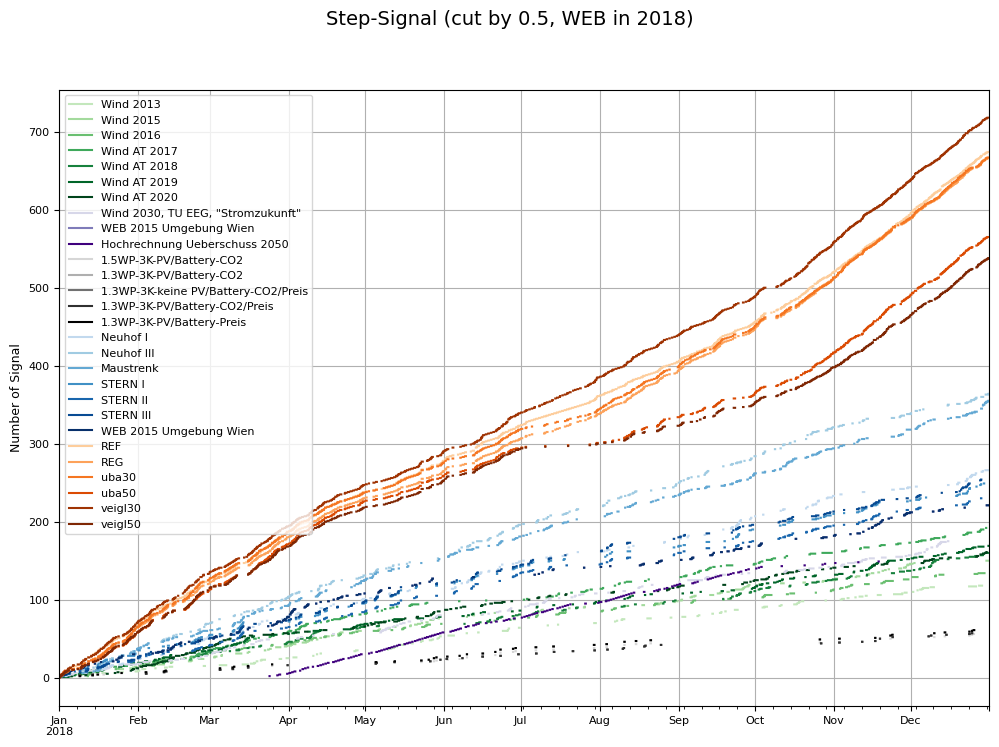

In [68]:
fig, ax = plt.subplots()

df_step_wind[df_step_wind.columns[0:7]].plot(figsize=(12,8), ylabel="Number of Signal", cmap=cmapgreen, grid=True, ax=ax)
df_step_R[df_step_R.columns[0:3]].plot(figsize=(12,8), ylabel="Number of Signal", cmap=cmappurple, grid=True, ax=ax)
df_step_Drexel[df_step_Drexel.columns[0:5]].plot(figsize=(12,8), cmap=cmapgrey, grid=True, ax=ax)
df_step_EA[df_step_EA.columns[0:7]].plot(figsize=(12,8), cmap=cmapblue, grid=True, ax=ax)
df_step_Max[df_step_Max.columns[0:6]].plot(figsize=(12,8), ylabel="Number of Signal", cmap=cmaporange, grid=True, ax=ax)

fig.suptitle(f'Step-Signal (cut by {cut}, WEB in {year})', fontsize=14)
fig.savefig(f"../data/Plots/cumplot_color_all_{cut}_{year}.png", dpi=300, bbox_inches="tight")

In [69]:
df_EA = df_EA.filter(["Maustrenk", "Neuhof I", "Neuhof III", "STERN I", "STERN II", "STERN III"])
df_all = df.merge(df_EA, left_index=True, right_index=True)
df_all

,Wind 2013,Wind 2015,Wind 2016,"Wind 2030, TU EEG, ""Stromzukunft""",WEB 2015 Umgebung Wien,Hochrechnung Ueberschuss 2050,Wind AT 2017,Wind AT 2018,Wind AT 2019,Wind AT 2020,...,1.3WP-3K-PV/Battery-CO2,1.3WP-3K-keine PV/Battery-CO2/Preis,1.3WP-3K-PV/Battery-CO2/Preis,1.3WP-3K-PV/Battery-Preis,Maustrenk,Neuhof I,Neuhof III,STERN I,STERN II,STERN III
2018-01-01 00:00:00,0.623076,0.029658,0.089650,0.301967,0.000000,0.0,0.034815,0.313971,0.081336,0.636425,...,0.0,0.0,0.0,0.0,0.691714,0.370625,0.423402,0.225750,0.315563,0.287625
2018-01-01 01:00:00,0.625853,0.031710,0.059536,0.299672,0.000000,0.0,0.032298,0.285723,0.062099,0.662732,...,0.0,0.0,0.0,0.0,0.694071,0.400833,0.495427,0.144187,0.201469,0.189000
2018-01-01 02:00:00,0.628622,0.029128,0.042812,0.294426,0.000000,0.0,0.027026,0.318035,0.045562,0.668128,...,0.0,0.0,0.0,0.0,0.936000,0.450625,0.566986,0.243375,0.233500,0.285375
2018-01-01 03:00:00,0.648394,0.029456,0.021632,0.396393,0.000000,0.0,0.027519,0.237349,0.037462,0.623272,...,0.0,0.0,0.0,0.0,0.594857,0.562500,0.584189,0.395062,0.264594,0.265125
2018-01-01 04:00:00,0.627305,0.029033,0.015125,0.486230,0.000000,0.0,0.025874,0.155524,0.053662,0.575042,...,0.0,0.0,0.0,0.0,0.312857,0.273125,0.337316,0.669188,0.564125,0.504188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,0.314554,0.396654,0.071725,0.204918,0.066582,0.0,0.158621,0.244374,0.673304,0.086003,...,0.0,0.0,0.0,0.0,0.123429,0.093333,0.076680,0.000000,0.000000,0.000000
2018-12-31 20:00:00,0.358647,0.336054,0.070473,0.215738,0.052745,0.0,0.218883,0.187702,0.606142,0.098482,...,0.0,0.0,0.0,0.0,0.146571,0.101458,0.080857,0.000000,0.000000,0.000000
2018-12-31 21:00:00,0.390740,0.275863,0.069313,0.225246,0.026788,0.0,0.236357,0.174650,0.659129,0.141990,...,0.0,0.0,0.0,0.0,0.081429,0.231458,0.345099,0.000000,0.000000,0.000000
2018-12-31 22:00:00,0.420899,0.192397,0.093453,0.235082,0.002470,0.0,0.266760,0.145799,0.683091,0.138954,...,0.0,0.0,0.0,0.0,0.150000,0.037292,0.182073,0.000000,0.000000,0.000000


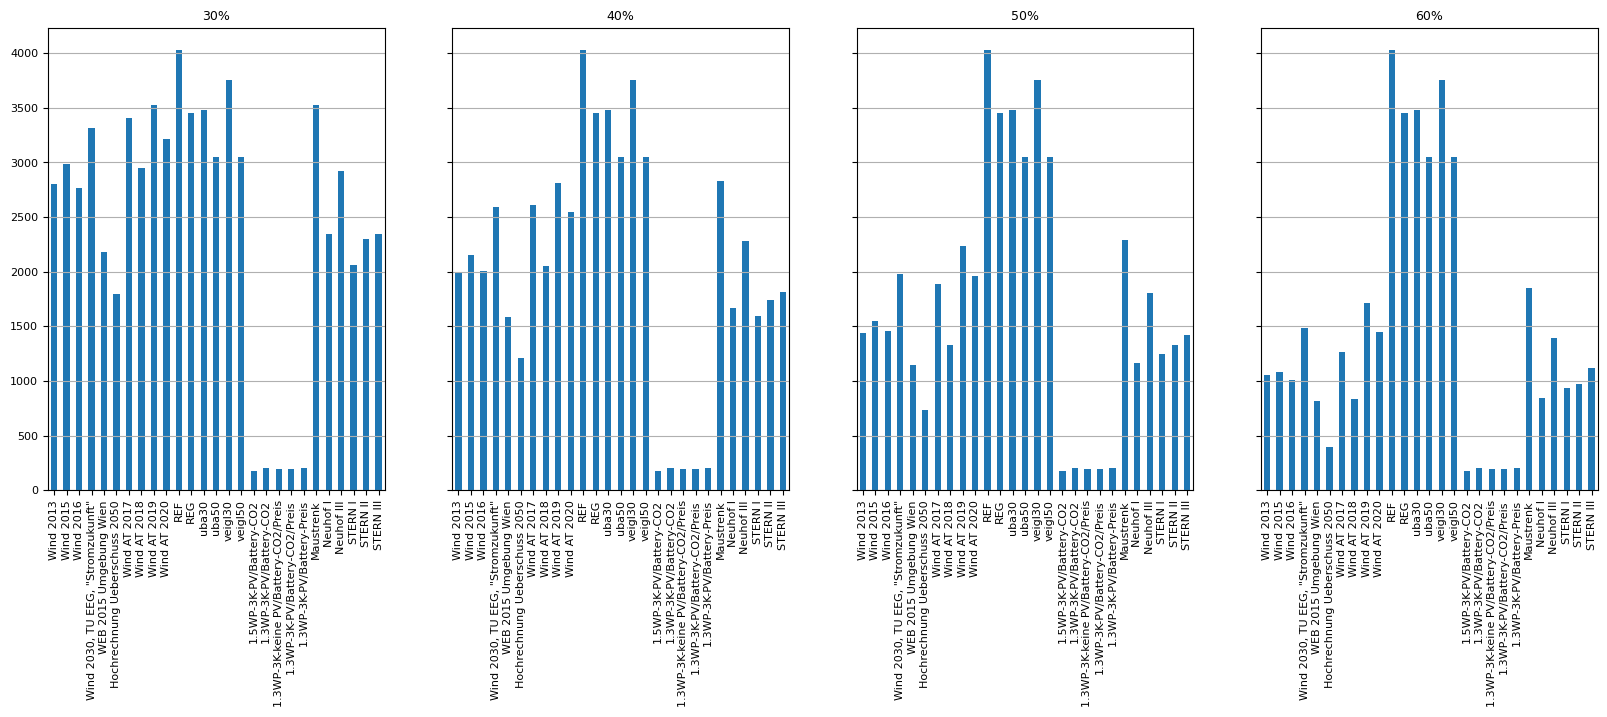

In [70]:
cutoffs = [0.3, 0.4, 0.5, 0.6]
anzahl_all = pd.DataFrame()
fig, ax = plt.subplots(1, len(cutoffs), sharey=True, figsize=(20, 6))
ax[0].title.set_text("30%")
ax[1].title.set_text("40%")
ax[2].title.set_text("50%")
ax[3].title.set_text("60%")
for i, x in enumerate(cutoffs):
    sig_all = df_all.where(df_all > x)
    sig_all.count().plot(kind="bar", ax=ax[i])
    anzahl_all[x] = sig_all.count()
    ax[i].grid(axis='y')
#fig.suptitle('Jahr 2018', fontsize=14)
fig.savefig(f"../data/Plots/Freigabe_all_{year}.png", dpi=300, bbox_inches="tight")
#df_all

In [71]:
cut = 0.5
df_sign_all = pd.DataFrame()
for c in df_all.columns:
    df_sign_all[c] = df_all[c].map(lambda x: -1 if x < cut else 1)
#df_sign_all

df_step_all = pd.DataFrame()
df_not_all = pd.DataFrame()

for b in df_sign_all.columns:
    df_step_all[b] = df_sign_all[b].shift(1).ne(df_sign_all[b]).where(df_sign_all[b] == 1).cumsum()
    df_not_all[b] = df_sign_all[b].shift(1).ne(df_sign_all[b]).where(df_sign_all[b] == -1).cumsum()

df_step_all.iloc[0, :] = 0
df_step_all

,Wind 2013,Wind 2015,Wind 2016,"Wind 2030, TU EEG, ""Stromzukunft""",WEB 2015 Umgebung Wien,Hochrechnung Ueberschuss 2050,Wind AT 2017,Wind AT 2018,Wind AT 2019,Wind AT 2020,...,1.3WP-3K-PV/Battery-CO2,1.3WP-3K-keine PV/Battery-CO2/Preis,1.3WP-3K-PV/Battery-CO2/Preis,1.3WP-3K-PV/Battery-Preis,Maustrenk,Neuhof I,Neuhof III,STERN I,STERN II,STERN III
2018-01-01 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-01-01 01:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
2018-01-01 02:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,NaN,NaN,NaN,NaN,1,NaN,1.0,NaN,NaN,NaN
2018-01-01 03:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,NaN,NaN,NaN,NaN,1,1.0,1.0,NaN,NaN,NaN
2018-01-01 04:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,169.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,169.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,169.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,169.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
df_step_all.fillna(0, inplace=True)
df_not_all.fillna(0, inplace=True)
desc_all = pd.DataFrame()
desc_all["Zeitraum mit Signal [h]"] = df_sign_all.where(df_sign_all > 0).sum()
desc_all["Nicht-Signal-Zeitraum [h]"] = 8760 - desc_all["Zeitraum mit Signal [h]"]
desc_all["Anzahl Signal-Perioden"] = df_step_all.max()
desc_all["Durchschnittliche Dauer Signal [h]"] = (desc_all["Zeitraum mit Signal [h]"] / desc_all["Anzahl Signal-Perioden"])
desc_all["Durchschnittliche Dauer Nicht-Signal [h]"] = desc_all["Nicht-Signal-Zeitraum [h]"] / desc_all["Anzahl Signal-Perioden"]

desc_all

,Zeitraum mit Signal [h],Nicht-Signal-Zeitraum [h],Anzahl Signal-Perioden,Durchschnittliche Dauer Signal [h],Durchschnittliche Dauer Nicht-Signal [h]
Wind 2013,1440.0,7320.0,118.0,12.203390,62.033898
Wind 2015,1545.0,7215.0,150.0,10.300000,48.100000
Wind 2016,1454.0,7306.0,134.0,10.850746,54.522388
"Wind 2030, TU EEG, ""Stromzukunft""",1979.0,6781.0,175.0,11.308571,38.748571
WEB 2015 Umgebung Wien,1146.0,7614.0,221.0,5.185520,34.452489
Hochrechnung Ueberschuss 2050,761.0,7999.0,151.0,5.039735,52.973510
Wind AT 2017,1884.0,6876.0,192.0,9.812500,35.812500
Wind AT 2018,1327.0,7433.0,160.0,8.293750,46.456250
Wind AT 2019,2232.0,6528.0,169.0,13.207101,38.627219
Wind AT 2020,1961.0,6799.0,162.0,12.104938,41.969136


In [73]:
len(df_all)

8760

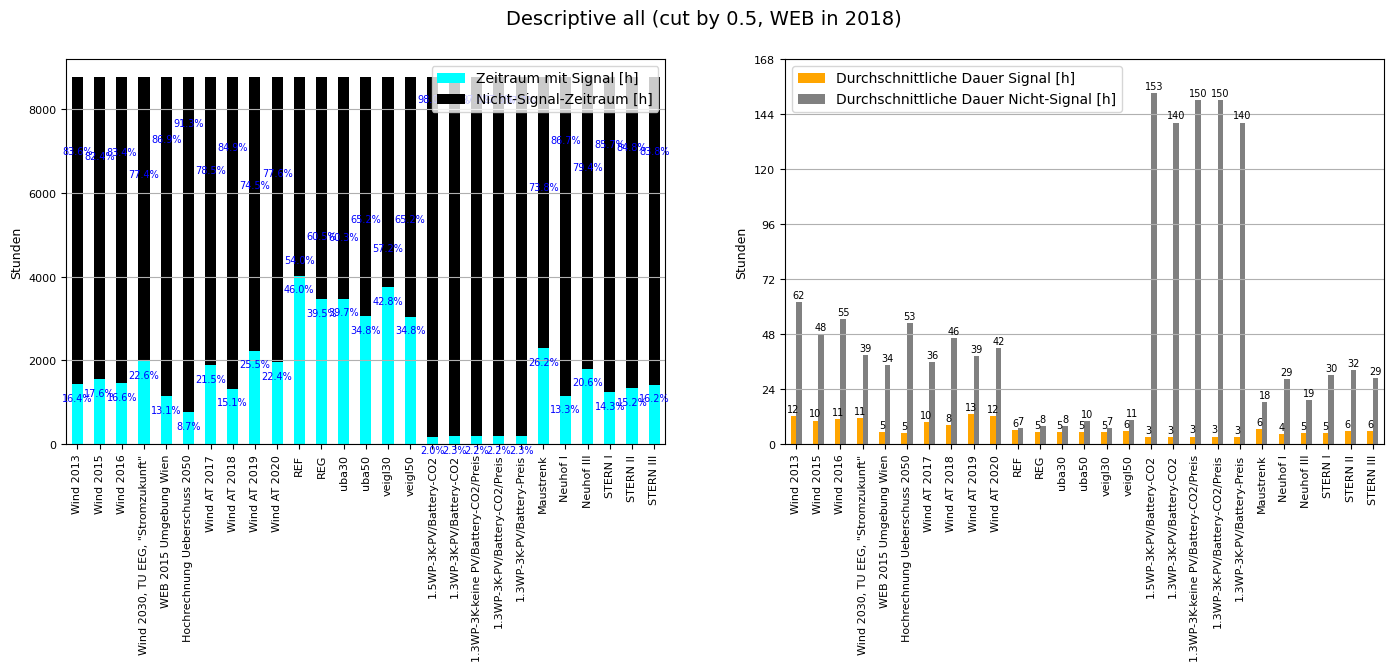

In [74]:
text_size = 10
fig, ax = plt.subplots(1,2, figsize=(17,5))
plt.rc('font', size=text_size)          # controls default text sizes
plt.rc('axes', titlesize=text_size)     # fontsize of the axes title
plt.rc('axes', labelsize=text_size)
desc_all[["Zeitraum mit Signal [h]","Nicht-Signal-Zeitraum [h]"]]\
    .plot(kind="bar",color=["cyan", "black"], stacked=True, ax = ax[0])
ax[0].set_ylabel("Stunden")
#desc["Anzahl Signal-Perioden"].plot(kind="bar",color=["cyan"], stacked=True, ax = ax[1])
#ax[1].set_ylabel("Anzahl Signal-Perioden")
desc_all[["Durchschnittliche Dauer Signal [h]","Durchschnittliche Dauer Nicht-Signal [h]"]]\
    .plot(kind="bar",color=["orange", "grey"], stacked=False, ax = ax[1])
ax[1].set_ylabel("Stunden")
for p in ax[0].patches:
      ax[0].annotate("{:.1f}%" .format(p.get_height()*100/len(df_all)), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=7, color='blue', xytext=(0, -10),
                     textcoords='offset points')
for p in ax[1].patches:
      ax[1].annotate("{:.0f}" .format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=7, color='black', xytext=(0, 5),
                     textcoords='offset points')
ax[0].grid(axis='y')
ax[1].grid(axis='y')
ax[1].yaxis.set_ticks(np.arange(0, 169, 24))
fig.suptitle(f'Descriptive all (cut by {cut}, WEB in {year})', fontsize=14)
fig.savefig(f"../data/Plots/descriptive_all_{cut}_{year}.png", dpi=300, bbox_inches='tight')

In [75]:
df_all_S = df_all.loc[(df_sign_all.index.month >= 4) & (df_sign_all.index.month < 10)]
df_all_W = df_all.loc[(df_sign_all.index.month <4) | (df_sign_all.index.month >= 10)]
df_all_S_sign = df_sign_all.loc[(df_sign_all.index.month >= 4) & (df_sign_all.index.month < 10)]
df_all_W_sign = df_sign_all.loc[(df_sign_all.index.month <4) | (df_sign_all.index.month >= 10)]
anzahl_all_S = pd.DataFrame()
anzahl_all_W = pd.DataFrame()
for i, x in enumerate(cutoffs):
    sig_all_S = df_all_S.where(df_all_S>x)
    anzahl_all_S[x] = sig_all_S.count()
    sig_all_W = df_all_W.where(df_all_W>x)
    anzahl_all_W[x] = sig_all_W.count()

In [76]:
df_all_S_step = pd.DataFrame()
df_all_S_not = pd.DataFrame()
df_all_W_step = pd.DataFrame()
df_all_W_not = pd.DataFrame()
for c in df_all_S_sign.columns:
    df_all_S_step[c] =  df_all_S_sign[c].shift(1).ne(df_all_S_sign[c]).where(df_all_S_sign[c]==1).cumsum()
    df_all_S_not[c] =  df_all_S_sign[c].shift(1).ne(df_all_S_sign[c]).where(df_all_S_sign[c]==-1).cumsum()
    df_all_W_step[c] =  df_all_W_sign[c].shift(1).ne(df_all_W_sign[c]).where(df_all_W_sign[c]==1).cumsum()
    df_all_W_not[c] =  df_all_W_sign[c].shift(1).ne(df_all_W_sign[c]).where(df_all_W_sign[c]==-1).cumsum()

In [77]:
len(df_all_S)

4392

In [78]:
len(df_all_W)

4368

In [79]:
desc_all_S = pd.DataFrame()
desc_all_S["Zeitraum mit Signal [h]"] = anzahl_all_S[cut]
desc_all_S["Nicht-Signal-Zeitraum [h]"] = len(df_all_S) - anzahl_all_S[cut]
desc_all_S["Anzahl Signal-Perioden"] = df_all_S_step.max()
desc_all_S["Durchschnittliche Dauer Signal [h]"] = (desc_all_S["Zeitraum mit Signal [h]"]/desc_all_S["Anzahl Signal-Perioden"])
desc_all_S["Durchschnittliche Dauer Nicht-Signal [h]"] = desc_all_S["Nicht-Signal-Zeitraum [h]"]/desc_all_S["Anzahl Signal-Perioden"]

desc_all_W = pd.DataFrame()
desc_all_W["Zeitraum mit Signal [h]"] = anzahl_all_W[cut]
desc_all_W["Nicht-Signal-Zeitraum [h]"] = len(df_all_W) - anzahl_all_W[cut]
desc_all_W["Anzahl Signal-Perioden"] = df_all_W_step.max()
desc_all_W["Durchschnittliche Dauer Signal [h]"] = (desc_all_W["Zeitraum mit Signal [h]"]/desc_all_W["Anzahl Signal-Perioden"])
desc_all_W["Durchschnittliche Dauer Nicht-Signal [h]"] = desc_all_W["Nicht-Signal-Zeitraum [h]"]/desc_all_W["Anzahl Signal-Perioden"]

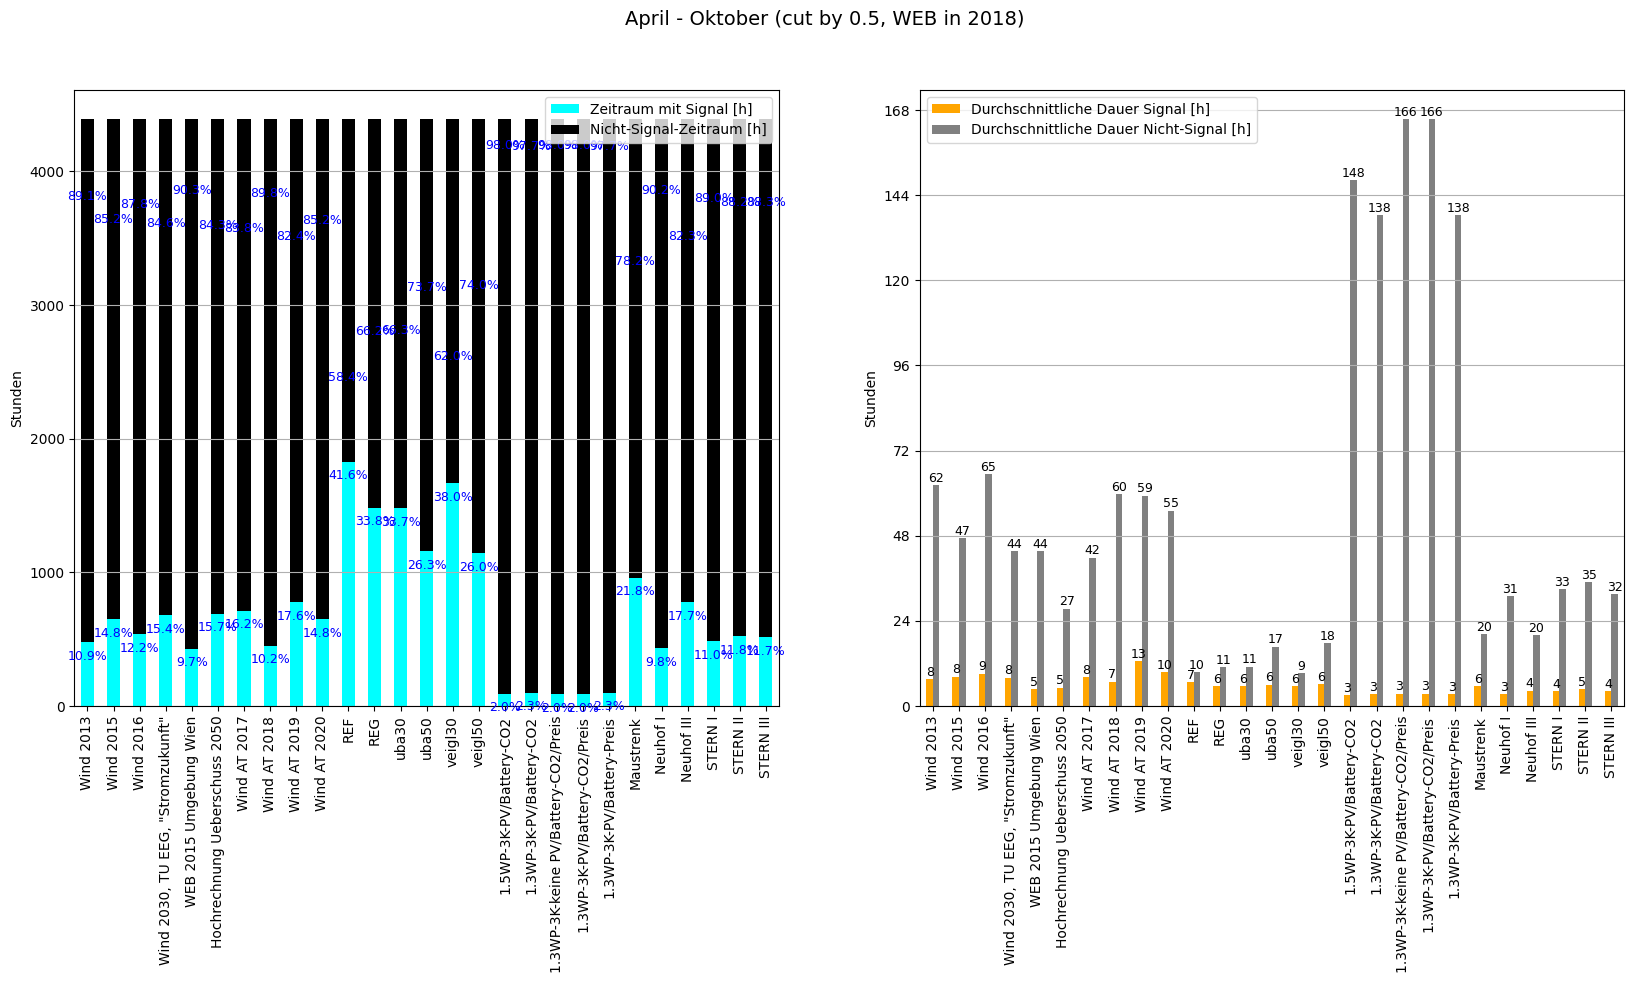

In [80]:
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(20,8))

plt.rc('font', size=text_size)          # controls default text sizes
plt.rc('axes', titlesize=text_size)     # fontsize of the axes title
plt.rc('axes', labelsize=text_size)

ax[0].set_ylabel("Stunden")
ax[1].set_ylabel("Stunden")
#ax[1].set_ylim(0,300)
desc_all_S[["Zeitraum mit Signal [h]","Nicht-Signal-Zeitraum [h]"]]\
   .plot(kind="bar", color=["cyan", "black"], stacked=True, ax = ax[0])
desc_all_S[["Durchschnittliche Dauer Signal [h]","Durchschnittliche Dauer Nicht-Signal [h]"]]\
   .plot(kind="bar", color=["orange", "grey"], stacked=False, ax = ax[1])
ax[0].grid(axis='y')
ax[1].grid(axis='y')

for p in ax[0].patches:
      ax[0].annotate("{:.1f}%" .format(p.get_height()*100/len(df_all_S)), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='blue', xytext=(0, -10),
                     textcoords='offset points')
for p in ax[1].patches:
      ax[1].annotate("{:.0f}" .format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                     textcoords='offset points')
ax[1].yaxis.set_ticks(np.arange(0, 169, 24))
fig.suptitle(f'April - Oktober (cut by {cut}, WEB in {year})', fontsize=14)
fig.savefig(f"../data/Plots/desc_all_sommers_{cut}_{year}.png", dpi=400, bbox_inches="tight")


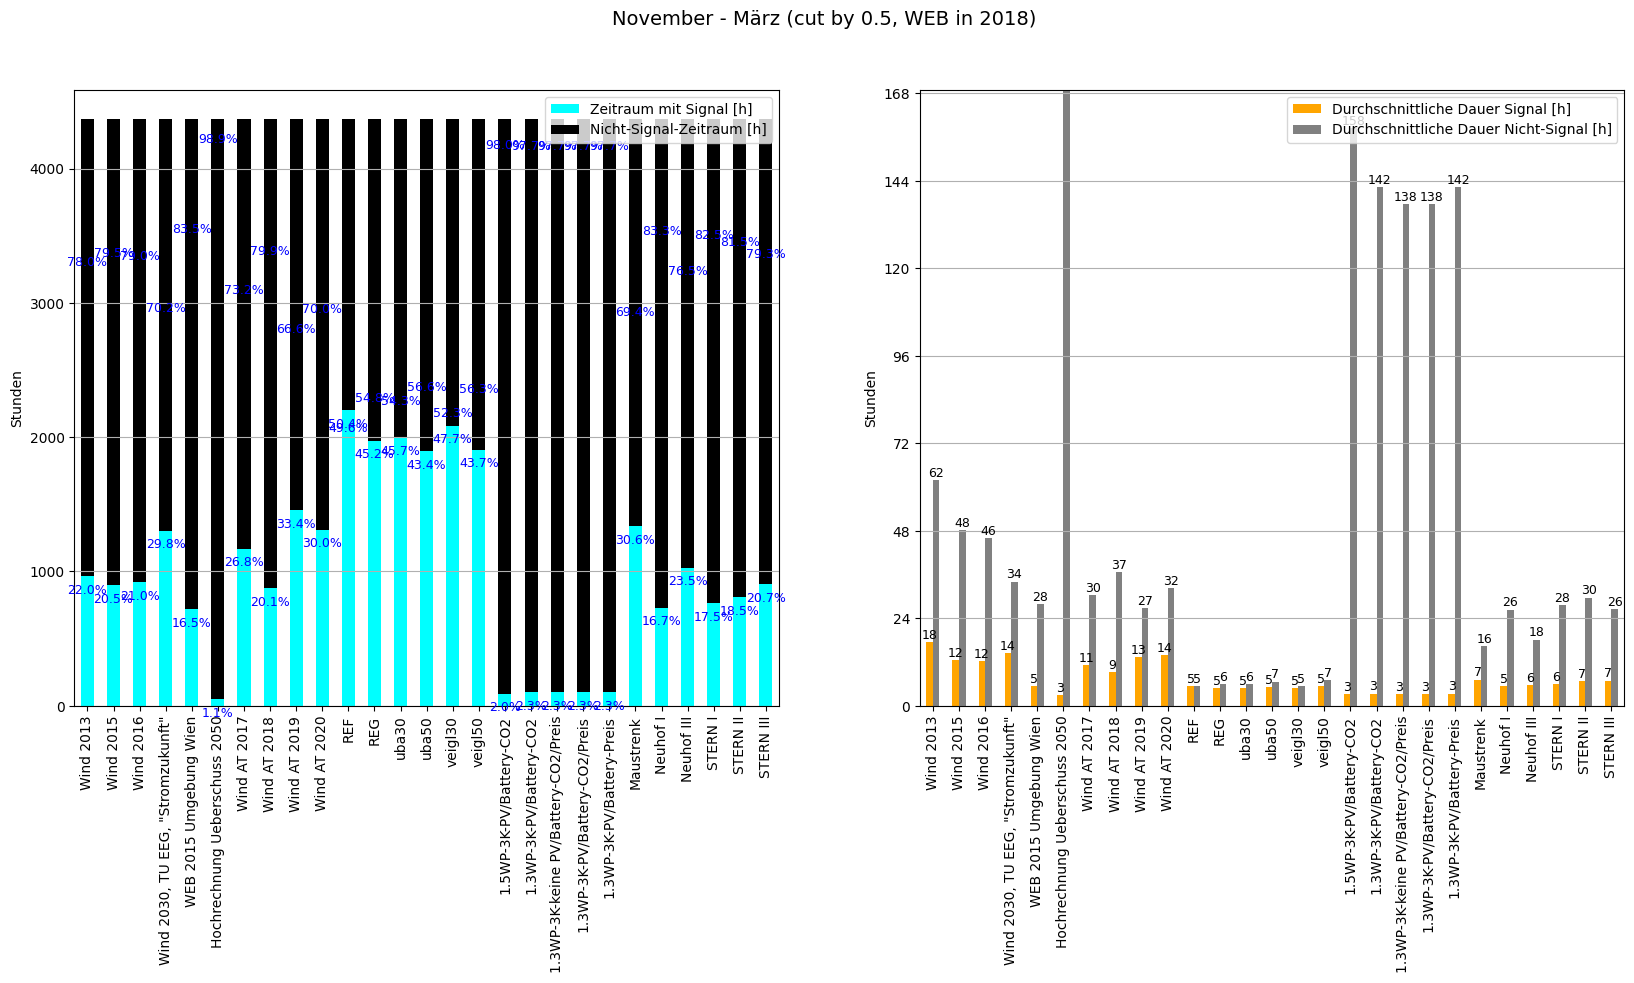

In [81]:
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(20,8))

ax[0].set_ylabel("Stunden")
ax[1].set_ylabel("Stunden")
#ax[1].set_ylim(0,300)
desc_all_W[["Zeitraum mit Signal [h]","Nicht-Signal-Zeitraum [h]"]]\
   .plot(kind="bar", color=["cyan", "black"], stacked=True, ax = ax[0])
desc_all_W[["Durchschnittliche Dauer Signal [h]","Durchschnittliche Dauer Nicht-Signal [h]"]]\
   .plot(kind="bar", color=["orange", "grey"], stacked=False, ax = ax[1])
ax[0].grid(axis='y')
ax[1].grid(axis='y')

for p in ax[0].patches:
      ax[0].annotate("{:.1f}%" .format(p.get_height()*100/len(df_all_W)), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='blue', xytext=(0, -10),
                     textcoords='offset points')
for p in ax[1].patches:
      ax[1].annotate("{:.0f}" .format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                     textcoords='offset points')
ax[1].set_ylim(0,169)
ax[1].yaxis.set_ticks(np.arange(0, 169, 24))
fig.suptitle(f'November - März (cut by {cut}, WEB in {year})', fontsize=14)
fig.savefig(f"../data/Plots/desc_all_winters_{cut}_{year}.png", dpi=400, bbox_inches="tight")

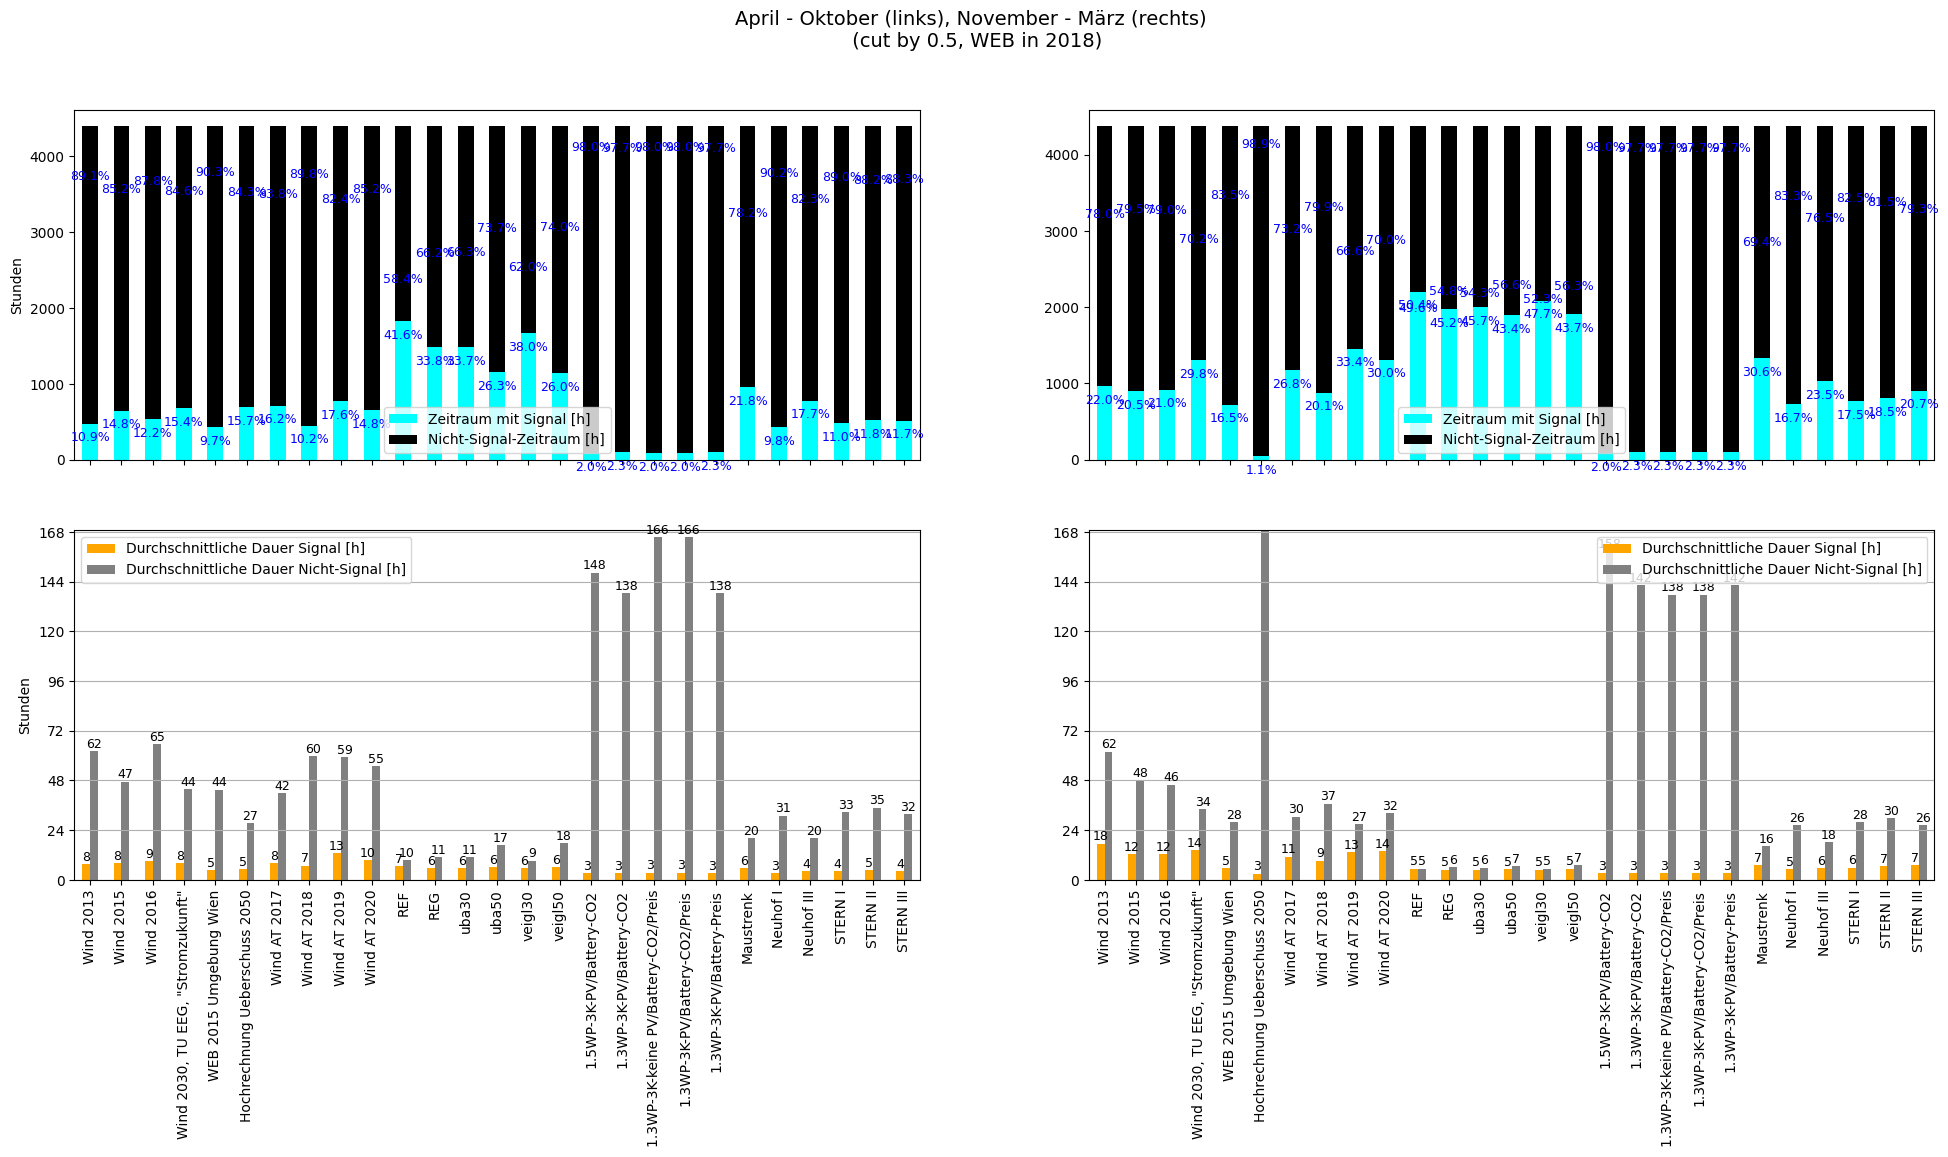

In [82]:
fig, ax = plt.subplots(2, 2, sharex=True, figsize=(24,10))
for i in range(2):
    ax[i, 0].set_ylabel("Stunden")
    ax[1, i].set_ylim(0,169)
    ax[1, i].yaxis.set_ticks(np.arange(0, 169, 24))
desc_all_S[["Zeitraum mit Signal [h]","Nicht-Signal-Zeitraum [h]"]]\
   .plot(kind="bar", color=["cyan", "black"], stacked=True, ax = ax[0, 0])
desc_all_S[["Durchschnittliche Dauer Signal [h]","Durchschnittliche Dauer Nicht-Signal [h]"]]\
   .plot(kind="bar", color=["orange", "grey"], stacked=False, ax = ax[1, 0])


desc_all_W[["Zeitraum mit Signal [h]","Nicht-Signal-Zeitraum [h]"]]\
   .plot(kind="bar", color=["cyan", "black"], stacked=True, ax = ax[0, 1])
desc_all_W[["Durchschnittliche Dauer Signal [h]","Durchschnittliche Dauer Nicht-Signal [h]"]]\
   .plot(kind="bar", color=["orange", "grey"], stacked=False, ax = ax[1, 1])

plt.setp(ax[1, 0], ylim=ax[1,1].get_ylim())

for p in ax[0, 0].patches:
      ax[0, 0].annotate("{:.1f}%" .format(p.get_height()*100/len(df_all_S)), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='blue', xytext=(0, -10),
                     textcoords='offset points')
for r in ax[0, 1].patches:
      ax[0, 1].annotate("{:.1f}%" .format(r.get_height()*100/len(df_all_W)), (r.get_x() + r.get_width() / 2., r.get_height()), ha='center', va='center', fontsize=9, color='blue', xytext=(0, -10),
                     textcoords='offset points')
for s in ax[1,1].patches:
      ax[1,1].annotate("{:.0f}" .format(s.get_height()), (s.get_x() + s.get_width() / 2., s.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                     textcoords='offset points')
for t in ax[1,0].patches:
      ax[1,0].annotate("{:.0f}" .format(t.get_height()), (t.get_x() + t.get_width() / 2., t.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                     textcoords='offset points')

for i in range(2):
#    ax[i, 0].grid(axis='y')
    ax[1, i].grid(axis='y')

fig.suptitle(f'April - Oktober (links), November - März (rechts) \n (cut by {cut}, WEB in {year})', fontsize=14)
fig.savefig(f"../data/Plots/desc_all_sommer_winter_vergleich_{cut}_{year}.png", dpi=400, bbox_inches="tight")